# Дослідження автомобілів проданих на аукціонах США

У цьому проекті проводиться аналіз даних про продажі автомобілів на аукціонах. Ми пройдемо через етапи передобробки даних, аналізу та візуалізації для виявлення ключових закономірностей і тенденцій.
Данні взято зі сайту autohelperbot.com за допомогою парсингу.

In [1]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline

In [2]:
file_path = 'car_sales.csv'


In [3]:
# Завантаження даних
data = pd.read_csv(file_path)


In [4]:
data.head()


,price,Cost of repair,Type of damage,sold,Vin,Engine,Market value,Mileage,title,image_url,Auction Date,Primary damage,car_url,auction_url
0,$ 4 350 USD,$ 20 282 USD,COLLISION,Sold,WAUKMAF4XHN038568,2.0L 4,$ 16 925 USD,93 743,2017 AUDI A4 ULTRA PREMIUM,https://b.autohelperbot.com/WAUKMAF4XHN038568-...,05/31/2024 17:00 UTC,UNDERCARRIAGE,https://autohelperbot.com/en/car/WAUKMAF4XHN03...,https://www.copart.com/lot/77482703
1,$ 6 800 USD,$ 0 USD,CDS VEHICLE,Sold,WBA7J2C38HG497702,2.0L 4,$ 24 750 USD,32 068 (actual),2017 BMW 740 XE,https://b.autohelperbot.com/WBA7J2C38HG497702-...,05/31/2024 14:00 UTC,MINOR DENT/SCRATCHES,https://autohelperbot.com/en/car/WBA7J2C38HG49...,https://www.copart.com/lot/56029604
2,$ 5 900 USD,$ 12 534 USD,COLLISION,Sold,1C4PJMLB8KD396917,2.4L 4,$ 19 925 USD,36 300 (actual),2019 JEEP CHEROKEE LATITUDE PLUS,https://b.autohelperbot.com/1C4PJMLB8KD396917-...,05/31/2024 14:00 UTC,SIDE,https://autohelperbot.com/en/car/1C4PJMLB8KD39...,https://www.copart.com/lot/52398224
3,$ 4 650 USD,$ 14 337 USD,COLLISION,Sold,KMHLR4AF9MU197094,1.6L 4,$ 21 125 USD,-,2021 HYUNDAI ELANTRA N LINE,https://b.autohelperbot.com/KMHLR4AF9MU197094-...,05/31/2024 14:00 UTC,FRONT END,https://autohelperbot.com/en/car/KMHLR4AF9MU19...,https://www.copart.com/lot/49331644
4,$ 6 400 USD,$ 17 408 USD,COLLISION,Sold,WAUF8AFC5HN053380,2.0L 4,$ 17 925 USD,124 698 (actual),2017 AUDI A6 PREMIUM,https://b.autohelperbot.com/WAUF8AFC5HN053380-...,05/31/2024 14:00 UTC,REAR END,https://autohelperbot.com/en/car/WAUF8AFC5HN05...,https://www.copart.com/lot/53083734


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278200 entries, 0 to 278199
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   price           278200 non-null  object
 1   Cost of repair  278200 non-null  object
 2   Type of damage  278200 non-null  object
 3   sold            278200 non-null  object
 4   Vin             278197 non-null  object
 5   Engine          278200 non-null  object
 6   Market value    278200 non-null  object
 7   Mileage         278200 non-null  object
 8   title           278200 non-null  object
 9   image_url       278200 non-null  object
 10  Auction Date    278200 non-null  object
 11  Primary damage  278167 non-null  object
 12  car_url         278200 non-null  object
 13  auction_url     278200 non-null  object
dtypes: object(14)
memory usage: 29.7+ MB


### Передобробка даних

In [6]:
#Зміна типу на строковий для подальшой обробки
data['price'] = data['price'].astype(str)
data['Cost of repair'] = data['Cost of repair'].astype(str)
data['Market value'] = data['Market value'].astype(str)
data['Mileage'] = data['Mileage'].astype(str)

In [7]:
# Заміна некорректних значень на NaN та видалення непотрібної інформації
data['price'] = data['price'].str.replace('[$, USD ]', '', regex=True).replace(r'[^0-9.]', '', regex=True)
data['Cost of repair'] = data['Cost of repair'].str.replace('[$, USD ]', '', regex=True).replace(r'[^0-9.]', '', regex=True)
data['Market value'] = data['Market value'].str.replace('[$, USD ]', '', regex=True).replace(r'[^0-9.]', '', regex=True)


In [8]:
# Перетворення в числовий формат
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['Cost of repair'] = pd.to_numeric(data['Cost of repair'], errors='coerce')
data['Market value'] = pd.to_numeric(data['Market value'], errors='coerce')

# Видалення всіх букв зі стовпця 'Mileage' та перетворення на числовий тип
data['Mileage'] = data['Mileage'].astype(str).str.replace(r'\D', '', regex=True)
# Заміна порожніх рядків на NaN
data['Mileage'] = data['Mileage'].replace('', np.nan)
# Перетворення на числовий тип
data['Mileage'] = data['Mileage'].astype(float)

In [9]:

data['Auction Date'] = data['Auction Date'].str[:-3]

# Перетворення стовпця 'Auction Date' на об'єкти datetime
data['Auction Date'] = pd.to_datetime(data['Auction Date'])


In [10]:
data.head

<bound method NDFrame.head of         price  Cost of repair Type of damage  sold                Vin  Engine  \
0        4350           20282      COLLISION  Sold  WAUKMAF4XHN038568  2.0L 4   
1        6800               0    CDS VEHICLE  Sold  WBA7J2C38HG497702  2.0L 4   
2        5900           12534      COLLISION  Sold  1C4PJMLB8KD396917  2.4L 4   
3        4650           14337      COLLISION  Sold  KMHLR4AF9MU197094  1.6L 4   
4        6400           17408      COLLISION  Sold  WAUF8AFC5HN053380  2.0L 4   
...       ...             ...            ...   ...                ...     ...   
278195   4200               0    CDS VEHICLE  Sold  1GA2G1DG8A1108260  6.0L 8   
278196    525            4265      COLLISION  Sold  4A3AE75H73E010610  3.0L 6   
278197   7100           17398      COLLISION  Sold  5YJ3E1EA9JF162363       -   
278198    500               0       DONATION  Sold  1J4GR48K16C214174  3.7L 6   
278199   2200               0    CDS VEHICLE  Sold  JN1AJ0HP6AM700749  3.5L 6  

In [11]:
# Підрахунок кількості дублікатів
duplicate_count = data.duplicated().sum()
duplicate_count

64361

In [12]:
# Видалення дублікатів
data = data.drop_duplicates(subset=['Vin'], keep='last')

In [13]:
# Видалення тих лотів, де не було указано мотора
data = data.dropna(subset=['Engine'])
data = data[~data['title'].str.contains("boat|MALI LSV25", case=False)]


In [14]:
data

,price,Cost of repair,Type of damage,sold,Vin,Engine,Market value,Mileage,title,image_url,Auction Date,Primary damage,car_url,auction_url
0,4350,20282,COLLISION,Sold,WAUKMAF4XHN038568,2.0L 4,16925,93743.0,2017 AUDI A4 ULTRA PREMIUM,https://b.autohelperbot.com/WAUKMAF4XHN038568-...,2024-05-31 17:00:00,UNDERCARRIAGE,https://autohelperbot.com/en/car/WAUKMAF4XHN03...,https://www.copart.com/lot/77482703
1,6800,0,CDS VEHICLE,Sold,WBA7J2C38HG497702,2.0L 4,24750,32068.0,2017 BMW 740 XE,https://b.autohelperbot.com/WBA7J2C38HG497702-...,2024-05-31 14:00:00,MINOR DENT/SCRATCHES,https://autohelperbot.com/en/car/WBA7J2C38HG49...,https://www.copart.com/lot/56029604
2,5900,12534,COLLISION,Sold,1C4PJMLB8KD396917,2.4L 4,19925,36300.0,2019 JEEP CHEROKEE LATITUDE PLUS,https://b.autohelperbot.com/1C4PJMLB8KD396917-...,2024-05-31 14:00:00,SIDE,https://autohelperbot.com/en/car/1C4PJMLB8KD39...,https://www.copart.com/lot/52398224
3,4650,14337,COLLISION,Sold,KMHLR4AF9MU197094,1.6L 4,21125,NaN,2021 HYUNDAI ELANTRA N LINE,https://b.autohelperbot.com/KMHLR4AF9MU197094-...,2024-05-31 14:00:00,FRONT END,https://autohelperbot.com/en/car/KMHLR4AF9MU19...,https://www.copart.com/lot/49331644
4,6400,17408,COLLISION,Sold,WAUF8AFC5HN053380,2.0L 4,17925,124698.0,2017 AUDI A6 PREMIUM,https://b.autohelperbot.com/WAUF8AFC5HN053380-...,2024-05-31 14:00:00,REAR END,https://autohelperbot.com/en/car/WAUF8AFC5HN05...,https://www.copart.com/lot/53083734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278195,4200,0,CDS VEHICLE,Sold,1GA2G1DG8A1108260,6.0L 8,12800,145091.0,2010 CHEVROLET EXPRESS G3500 LT,https://b.autohelperbot.com/1GA2G1DG8A1108260-...,2024-04-30 17:00:00,NORMAL WEAR,https://autohelperbot.com/en/car/1GA2G1DG8A110...,https://www.copart.com/lot/52357514
278196,525,4265,COLLISION,Sold,4A3AE75H73E010610,3.0L 6,0,109893.0,2003 MITSUBISHI ECLIPSE SPYDER GTS,https://b.autohelperbot.com/4A3AE75H73E010610-...,2024-04-30 12:52:00,SIDE,https://autohelperbot.com/en/car/4A3AE75H73E01...,https://www.copart.com/lot/45725674
278197,7100,17398,COLLISION,Sold,5YJ3E1EA9JF162363,-,21650,46164.0,2018 TESLA MODEL 3,https://b.autohelperbot.com/5YJ3E1EA9JF162363-...,2024-04-30 16:00:00,SIDE,https://autohelperbot.com/en/car/5YJ3E1EA9JF16...,https://www.copart.com/lot/48339444
278198,500,0,DONATION,Sold,1J4GR48K16C214174,3.7L 6,4925,189354.0,2006 JEEP GRAND CHEROKEE LAREDO,https://b.autohelperbot.com/1J4GR48K16C214174-...,2024-04-30 17:00:00,FRONT END,https://autohelperbot.com/en/car/1J4GR48K16C21...,https://www.copart.com/lot/69277043


## Додавання нових стовпців

In [15]:
data_cleaned = data.copy()


In [16]:
# Створення колонки з назвою аукціона
data_cleaned['auction'] = data_cleaned['auction_url'].apply(
    lambda x: re.findall(r'https?://(?:www\.)?([^\.]+)', x)[0] if re.findall(r'https?://(?:www\.)?([^\.]+)', x) else x
)

In [17]:
# Створення нового стовпця 'brand' з витяганням марки машини з назви
data_cleaned['brand'] = data_cleaned['title'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')


In [18]:
# Створення нового стовпця 'model' з витяганням моделі машини з назви
data_cleaned['model'] = data_cleaned['title'].apply(lambda x: ' '.join(x.split()[1:3]) if len(x.split()) > 2 else 'Unknown')


In [19]:
# Отримання унікальних назв моделей
unique_models = data_cleaned['model'].unique()
# Приведення назв моделей до одного регістру
data_cleaned['model'] = data_cleaned['model'].str.upper()
# Функція для отримання мапінгу моделей з використанням fuzzy matching
def get_model_mapping(models, threshold=80):
    model_mapping = {}
    for model in models:
        if model not in model_mapping:
            matches = process.extract(model, models, limit=len(models))
            similar_models = [match[0] for match in matches if match[1] >= threshold]
            for similar_model in similar_models:
                model_mapping[similar_model] = model
    return model_mapping

# Отримання мапінгу моделей
model_mapping = get_model_mapping(unique_models)

# Застосування мапінгу до даних
data_cleaned['model'] = data_cleaned['model'].map(model_mapping)

In [20]:
# Додавання нового стовпця 'year' з витягненням року випуску автомобіля з назви
data_cleaned['year'] = data_cleaned['title'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else 'Unknown')
data_cleaned['year'] = pd.to_numeric(data_cleaned['year'], errors='coerce').fillna(0).astype(int) 
data_cleaned = data_cleaned[data_cleaned['year'] <= 2024]

In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213568 entries, 0 to 278199
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   price           213568 non-null  int64         
 1   Cost of repair  213568 non-null  int64         
 2   Type of damage  213568 non-null  object        
 3   sold            213568 non-null  object        
 4   Vin             213567 non-null  object        
 5   Engine          213568 non-null  object        
 6   Market value    213568 non-null  int64         
 7   Mileage         193278 non-null  float64       
 8   title           213568 non-null  object        
 9   image_url       213568 non-null  object        
 10  Auction Date    213568 non-null  datetime64[ns]
 11  Primary damage  213543 non-null  object        
 12  car_url         213568 non-null  object        
 13  auction_url     213568 non-null  object        
 14  auction         213568 non-null  object  

Нижче я додав класифікацію розміру машин по назві, взявши дані з https://public.opendatasoft.com/explore/dataset/all-vehicles-model/export/

In [22]:
# Завантаження даних
all_vehicles_model = pd.read_csv('all-vehicles-model.csv', on_bad_lines='skip', delimiter=';')

# Функція для виділення ключа моделі
def extract_model_key(title):
    parts = title.split()
    if len(parts) >= 3:
        return parts[1].upper() + ' ' + parts[2].upper()
    else:
        return 'UNKNOWN MODEL'

# Створення узагальненого ключа для злиття
data_cleaned['generalized_model'] = data_cleaned['title'].apply(extract_model_key)

# Розділення generalized_model на марку та модель
data_cleaned[['make', 'base_model']] = data_cleaned['generalized_model'].str.split(' ', expand=True, n=1)

# Підготовка all_vehicles_model для злиття
all_vehicles_model['Make'] = all_vehicles_model['Make'].str.upper()
all_vehicles_model['base_model'] = all_vehicles_model['Model'].str.split(' ').str[0].str.upper()  # Враховуємо тільки базову модель

# Створення ключа для злиття
all_vehicles_model['merge_key'] = all_vehicles_model['Make'] + ' ' + all_vehicles_model['base_model']
data_cleaned['merge_key'] = data_cleaned['make'] + ' ' + data_cleaned['base_model']

# Злиття даних
data_cleaned = pd.merge(data_cleaned, all_vehicles_model[['merge_key', 'Vehicle Size Class']], on='merge_key', how='left')

# Заповнення пустих значень у колонці Vehicle Size Class значенням 'Unknown'
data_cleaned['Vehicle Size Class'] = data_cleaned['Vehicle Size Class'].fillna('Unknown')

In [23]:
# Очистка від дублікатів
data_cleaned['Vin'] = data_cleaned['Vin'].str.strip()
data_cleaned = data_cleaned.drop_duplicates(subset=['Vin'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213568 entries, 0 to 29412486
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   price               213568 non-null  int64         
 1   Cost of repair      213568 non-null  int64         
 2   Type of damage      213568 non-null  object        
 3   sold                213568 non-null  object        
 4   Vin                 213567 non-null  object        
 5   Engine              213568 non-null  object        
 6   Market value        213568 non-null  int64         
 7   Mileage             193278 non-null  float64       
 8   title               213568 non-null  object        
 9   image_url           213568 non-null  object        
 10  Auction Date        213568 non-null  datetime64[ns]
 11  Primary damage      213543 non-null  object        
 12  car_url             213568 non-null  object        
 13  auction_url         213568 non-n

In [24]:
data_cleaned.head()

,price,Cost of repair,Type of damage,sold,Vin,Engine,Market value,Mileage,title,image_url,...,auction_url,auction,brand,model,year,generalized_model,make,base_model,merge_key,Vehicle Size Class
0,4350,20282,COLLISION,Sold,WAUKMAF4XHN038568,2.0L 4,16925,93743.0,2017 AUDI A4 ULTRA PREMIUM,https://b.autohelperbot.com/WAUKMAF4XHN038568-...,...,https://www.copart.com/lot/77482703,copart,AUDI,AUDI A4,2017,AUDI A4,AUDI,A4,AUDI A4,Compact Cars
217,6800,0,CDS VEHICLE,Sold,WBA7J2C38HG497702,2.0L 4,24750,32068.0,2017 BMW 740 XE,https://b.autohelperbot.com/WBA7J2C38HG497702-...,...,https://www.copart.com/lot/56029604,copart,BMW,BMW 740,2017,BMW 740,BMW,740,BMW 740,Unknown
218,5900,12534,COLLISION,Sold,1C4PJMLB8KD396917,2.4L 4,19925,36300.0,2019 JEEP CHEROKEE LATITUDE PLUS,https://b.autohelperbot.com/1C4PJMLB8KD396917-...,...,https://www.copart.com/lot/52398224,copart,JEEP,JEEP CHEROKEE,2019,JEEP CHEROKEE,JEEP,CHEROKEE,JEEP CHEROKEE,Small Sport Utility Vehicle 4WD
400,4650,14337,COLLISION,Sold,KMHLR4AF9MU197094,1.6L 4,21125,NaN,2021 HYUNDAI ELANTRA N LINE,https://b.autohelperbot.com/KMHLR4AF9MU197094-...,...,https://www.copart.com/lot/49331644,copart,HYUNDAI,HYUNDAI ELANTRA,2021,HYUNDAI ELANTRA,HYUNDAI,ELANTRA,HYUNDAI ELANTRA,Midsize Cars
563,6400,17408,COLLISION,Sold,WAUF8AFC5HN053380,2.0L 4,17925,124698.0,2017 AUDI A6 PREMIUM,https://b.autohelperbot.com/WAUF8AFC5HN053380-...,...,https://www.copart.com/lot/53083734,copart,AUDI,AUDI A4,2017,AUDI A6,AUDI,A6,AUDI A6,Midsize Cars


In [25]:
# Кількість пустих значень в 'Vehicle Size Class'
unknown_count = data_cleaned['Vehicle Size Class'].value_counts().get('Unknown', 0)

print(f'Number of "Unknown" entries in Vehicle Size Class: {unknown_count}')

Number of "Unknown" entries in Vehicle Size Class: 16994


In [26]:
# Створення словника для об'єднання схожих значень
damage_mapping = {
    'COLLISION': 'Collision',
    'Collision': 'Collision',
    'OTHER COMPREHENSIVE': 'Other',
    'Other': 'Other',
    'CDS VEHICLE': 'CDS Vehicle',
    'THEFT': 'Theft',
    'PROPERTY DAMAGE': 'Property Damage',
    'PUBLIC CONSIGNMENT': 'Public Consignment',
    'DONATION': 'Donation',
    'WATER/FLOOD': 'Water/Flood',
    'BURN': 'Burn',
    'HAIL': 'Hail',
    'RENTAL': 'Rental',
    'IMPOUND': 'Impound',
    'REPOSSESSION': 'Repossession',
    'FLEET/LEASE': 'Fleet/Lease',
    'VANDALISM': 'Vandalism',
    'WIND': 'Wind',
    'DEALER CONSIGNMENT': 'Dealer Consignment',
    'FIRE': 'Fire',
    'WATER': 'Water/Flood',
    'CATASTROPHE': 'Catastrophe',
    'UNINSURED MOTORISTS': 'Uninsured Motorists',
    'Other(Lease/Rental)': 'Other',
    'Other(Repossession)': 'Other',
    'Other(Charity)': 'Other'
    # Додайте інші відповідності, якщо є
}

# Замінити значення у стовпці 'Type of damage' на об'єднані значення
data_cleaned['Type of damage'] = data_cleaned['Type of damage'].replace(damage_mapping)

In [27]:
# Видалення зайвих стовпців
data_cleaned = data_cleaned.drop(columns=['Vin', 'image_url', 'car_url', 'auction_url', 'sold'])

In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213568 entries, 0 to 29412486
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   price               213568 non-null  int64         
 1   Cost of repair      213568 non-null  int64         
 2   Type of damage      213568 non-null  object        
 3   Engine              213568 non-null  object        
 4   Market value        213568 non-null  int64         
 5   Mileage             193278 non-null  float64       
 6   title               213568 non-null  object        
 7   Auction Date        213568 non-null  datetime64[ns]
 8   Primary damage      213543 non-null  object        
 9   auction             213568 non-null  object        
 10  brand               213568 non-null  object        
 11  model               213554 non-null  object        
 12  year                213568 non-null  int32         
 13  generalized_model   213568 non-n

In [29]:
data_cleaned

,price,Cost of repair,Type of damage,Engine,Market value,Mileage,title,Auction Date,Primary damage,auction,brand,model,year,generalized_model,make,base_model,merge_key,Vehicle Size Class
0,4350,20282,Collision,2.0L 4,16925,93743.0,2017 AUDI A4 ULTRA PREMIUM,2024-05-31 17:00:00,UNDERCARRIAGE,copart,AUDI,AUDI A4,2017,AUDI A4,AUDI,A4,AUDI A4,Compact Cars
217,6800,0,CDS Vehicle,2.0L 4,24750,32068.0,2017 BMW 740 XE,2024-05-31 14:00:00,MINOR DENT/SCRATCHES,copart,BMW,BMW 740,2017,BMW 740,BMW,740,BMW 740,Unknown
218,5900,12534,Collision,2.4L 4,19925,36300.0,2019 JEEP CHEROKEE LATITUDE PLUS,2024-05-31 14:00:00,SIDE,copart,JEEP,JEEP CHEROKEE,2019,JEEP CHEROKEE,JEEP,CHEROKEE,JEEP CHEROKEE,Small Sport Utility Vehicle 4WD
400,4650,14337,Collision,1.6L 4,21125,NaN,2021 HYUNDAI ELANTRA N LINE,2024-05-31 14:00:00,FRONT END,copart,HYUNDAI,HYUNDAI ELANTRA,2021,HYUNDAI ELANTRA,HYUNDAI,ELANTRA,HYUNDAI ELANTRA,Midsize Cars
563,6400,17408,Collision,2.0L 4,17925,124698.0,2017 AUDI A6 PREMIUM,2024-05-31 14:00:00,REAR END,copart,AUDI,AUDI A4,2017,AUDI A6,AUDI,A6,AUDI A6,Midsize Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29411796,4200,0,CDS Vehicle,6.0L 8,12800,145091.0,2010 CHEVROLET EXPRESS G3500 LT,2024-04-30 17:00:00,NORMAL WEAR,copart,CHEVROLET,CHEVROLET EXPRESS,2010,CHEVROLET EXPRESS,CHEVROLET,EXPRESS,CHEVROLET EXPRESS,"Vans, Passenger Type"
29411915,525,4265,Collision,3.0L 6,0,109893.0,2003 MITSUBISHI ECLIPSE SPYDER GTS,2024-04-30 12:52:00,SIDE,copart,MITSUBISHI,MITSUBISHI ECLIPSE,2003,MITSUBISHI ECLIPSE,MITSUBISHI,ECLIPSE,MITSUBISHI ECLIPSE,Subcompact Cars
29412131,7100,17398,Collision,-,21650,46164.0,2018 TESLA MODEL 3,2024-04-30 16:00:00,SIDE,copart,TESLA,TESLA MODEL,2018,TESLA MODEL,TESLA,MODEL,TESLA MODEL,Midsize Cars
29412275,500,0,Donation,3.7L 6,4925,189354.0,2006 JEEP GRAND CHEROKEE LAREDO,2024-04-30 17:00:00,FRONT END,copart,JEEP,JEEP GRAND,2006,JEEP GRAND,JEEP,GRAND,JEEP GRAND,Standard Sport Utility Vehicle 2WD


## Аналіз

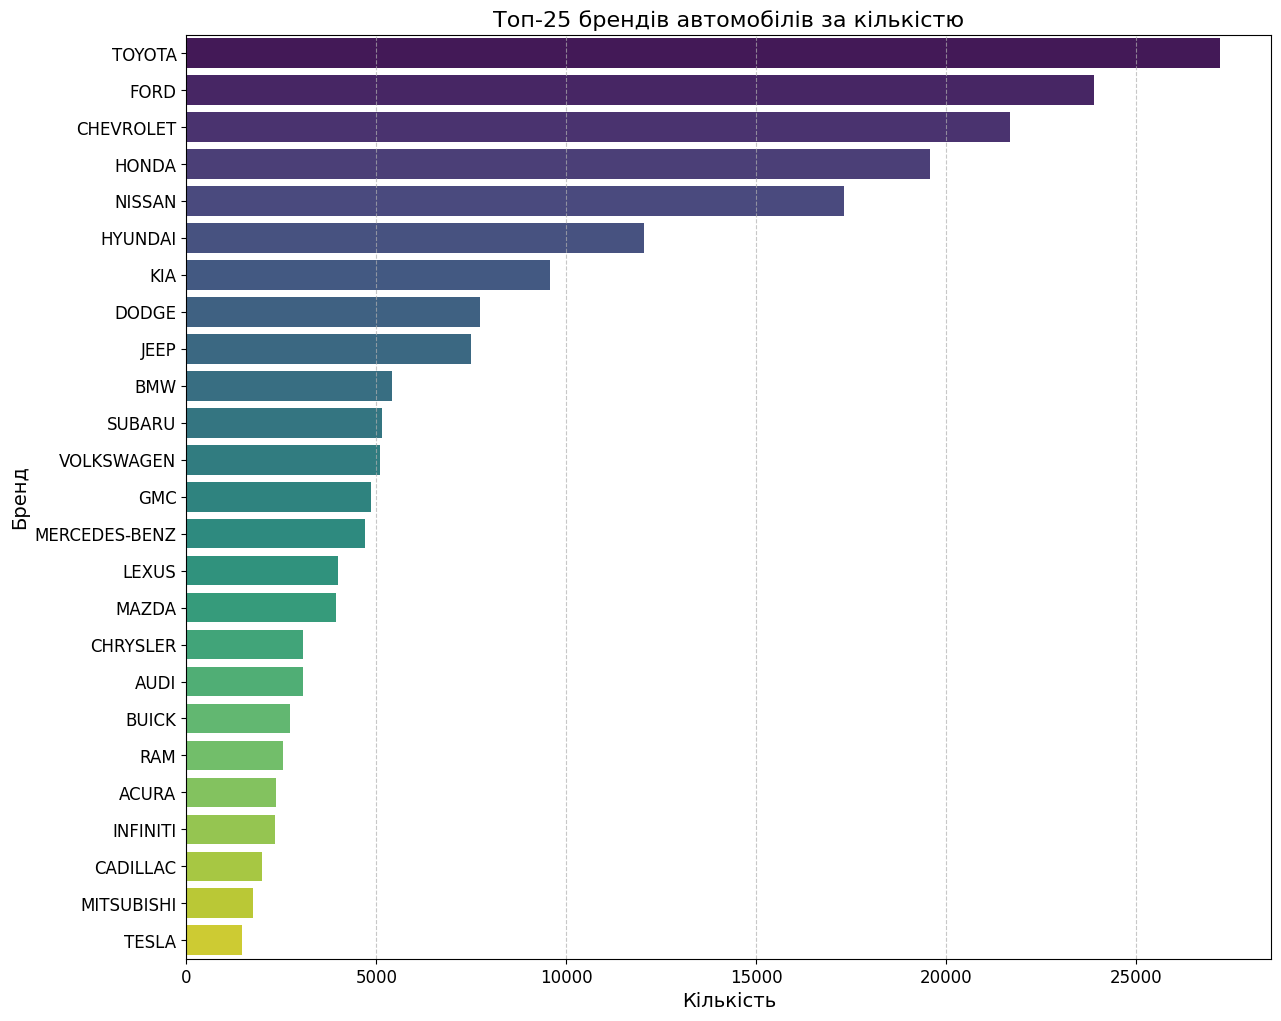

In [54]:
# Розрахунок топ-25 брендів за кількістю
top_25_brands = data_cleaned['brand'].value_counts().nlargest(25).reset_index()
top_25_brands.columns = ['brand', 'count']

# Побудова горизонтальної стовпчастої діаграми
plt.figure(figsize=(14, 12))
sns.barplot(x='count', y='brand', data=top_25_brands, palette="viridis", hue='brand', dodge=False, legend=False)
plt.title('Топ-25 брендів автомобілів за кількістю', fontsize=16)
plt.xlabel('Кількість', fontsize=14)
plt.ylabel('Бренд', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Найпопулярніші бренди автомобілів серед продажів – Toyota, Ford, Chevrolet та Honda. Це свідчить про високий попит на автомобілі цих марок, що може бути обумовлено їхньою надійністю, доступністю та популярністю на ринку.

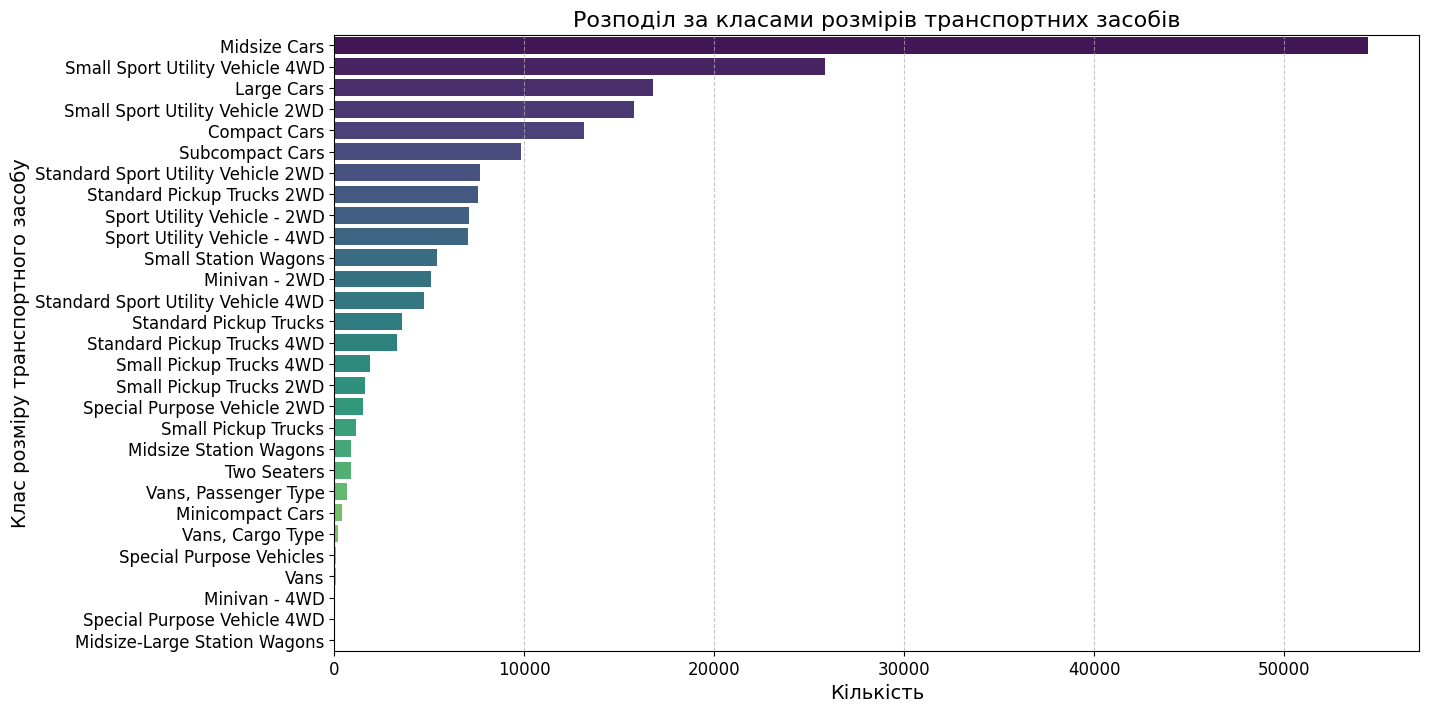

In [55]:
# Розподіл за класами розмірів транспортних засобів
vehicle_size_counts = data_cleaned[data_cleaned['Vehicle Size Class'] != 'Unknown']['Vehicle Size Class'].value_counts().reset_index()
vehicle_size_counts.columns = ['Vehicle Size Class', 'count']

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='Vehicle Size Class', data=vehicle_size_counts, palette="viridis", hue='Vehicle Size Class', dodge=False, legend=False)
plt.title('Розподіл за класами розмірів транспортних засобів', fontsize=16)
plt.xlabel('Кількість', fontsize=14)
plt.ylabel('Клас розміру транспортного засобу', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Найбільш поширеними типами транспортних засобів є легкові автомобілі середнього розміру та невеликі позашляховики, що може відображати переваги споживачів щодо зручності та практичності. Інші типи транспортних засобів, такі як фургони, мінівени та спеціальні транспортні засоби, представлені в меншій кількості, що може вказувати на їхню нішеву роль або обмежений попит.

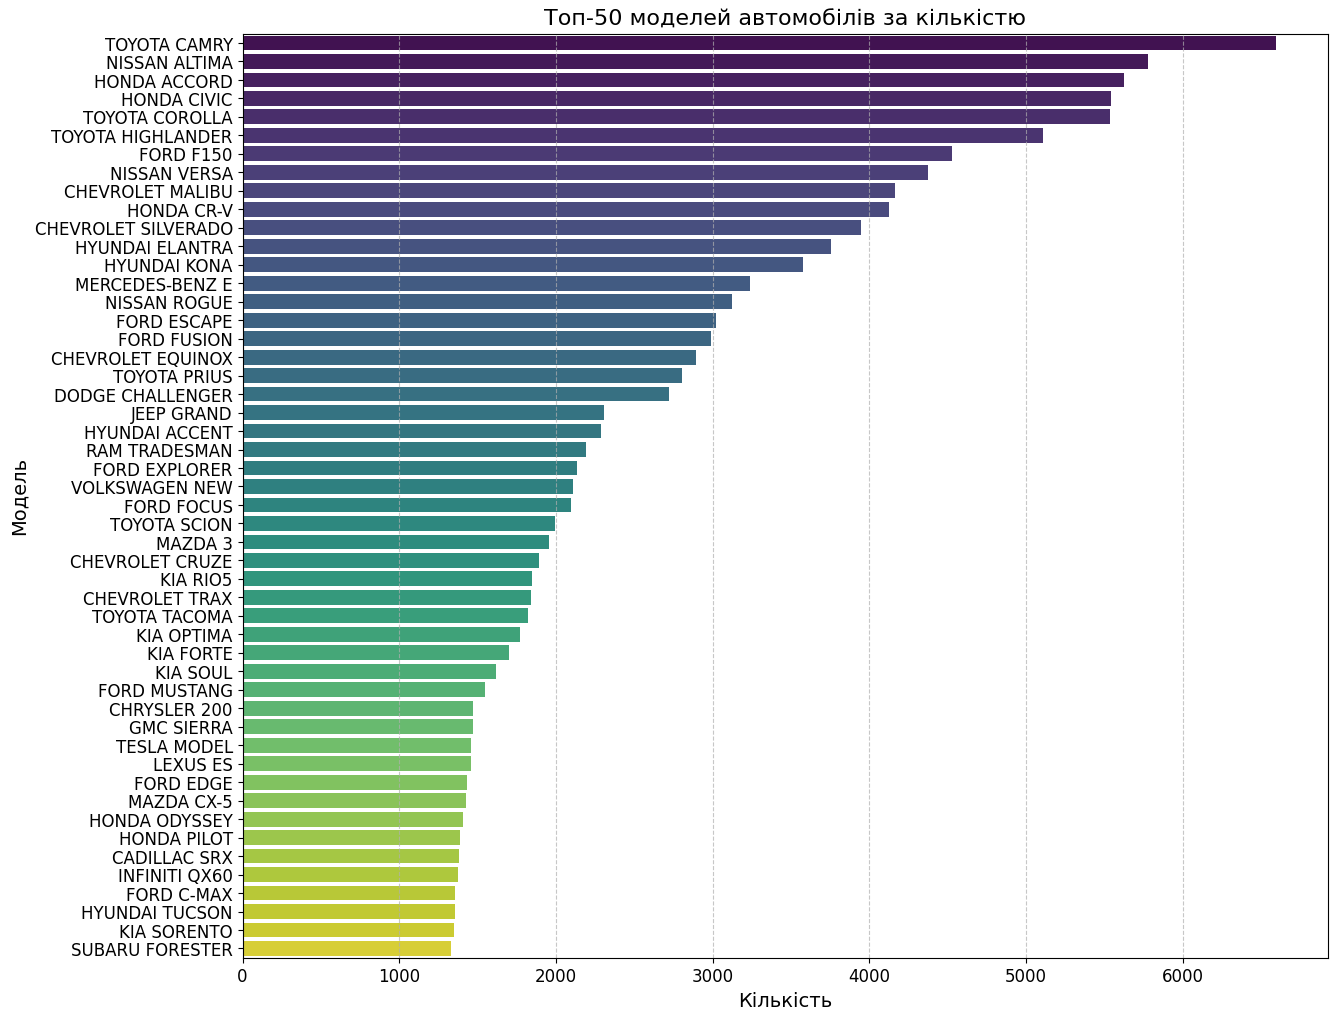

In [56]:
# Розрахунок топ-50 моделей за кількістю
top_50_models = data_cleaned['model'].value_counts().nlargest(50).reset_index()
top_50_models.columns = ['model', 'count']

# Побудова горизонтальної стовпчастої діаграми
plt.figure(figsize=(14, 12))
sns.barplot(x='count', y='model', data=top_50_models, palette="viridis", hue='model', dodge=False, legend=False)
plt.title('Топ-50 моделей автомобілів за кількістю', fontsize=16)
plt.xlabel('Кількість', fontsize=14)
plt.ylabel('Модель', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Лідери рейтингу, Toyota Camry, Nissan Altima та Honda Accord, суттєво випереджають інші моделі, що свідчить про їх високу популярність серед споживачів.

З іншого боку, моделі, що знаходяться в кінці списку, такі як Hyundai Tucson, Subaru Forester та Kia Sorento, мають значно меншу кількість. Це може бути пов'язано з різними факторами, такими як ціна, цільова аудиторія, доступність та маркетингова стратегія.

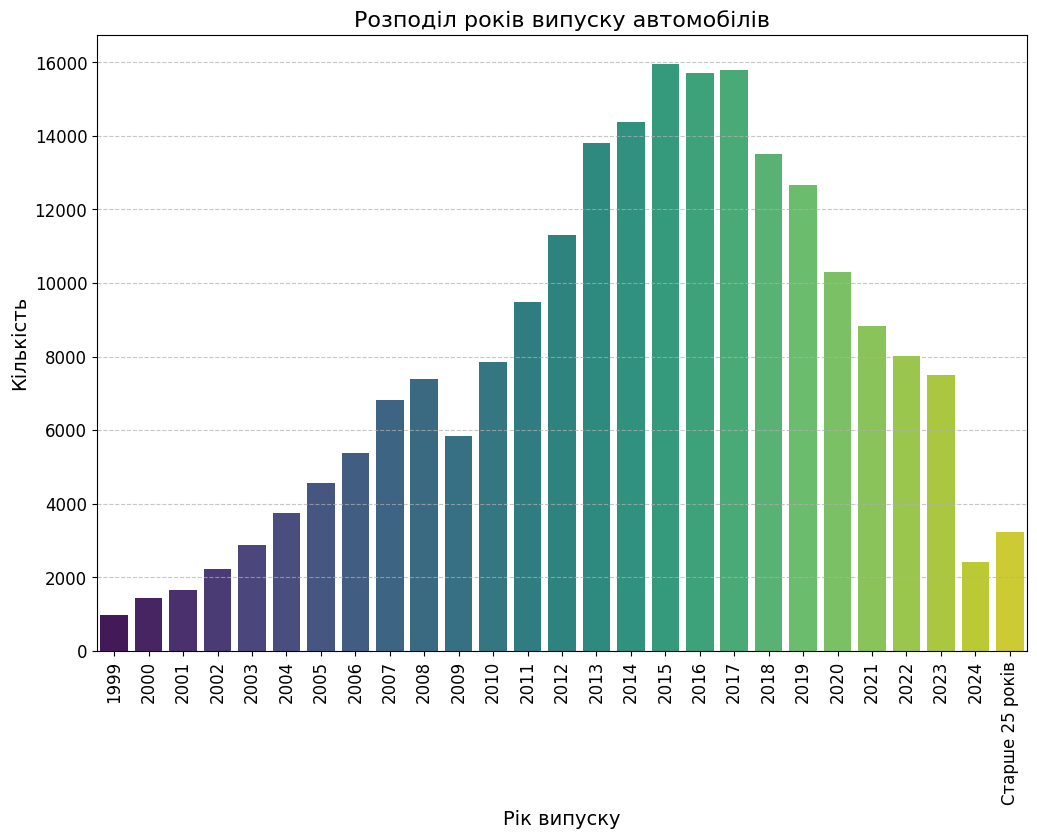

In [61]:
# Створення нового стовпця 'year_group' для візуалізації
data_cleaned['year_group'] = data_cleaned['year'].apply(lambda x: 'Старше 25 років' if x < 2024 - 25 else str(x))

# Побудова стовпчастої діаграми для розподілу років випуску з підсумками
plt.figure(figsize=(12, 8))
year_counts = data_cleaned['year_group'].value_counts().sort_index().reset_index()
year_counts.columns = ['year_group', 'count']
sns.barplot(x='year_group', y='count', data=year_counts, palette="viridis", hue='year_group', dodge=False, legend=False)
plt.title('Розподіл років випуску автомобілів', fontsize=16)
plt.xlabel('Рік випуску', fontsize=14)
plt.ylabel('Кількість', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Більшість автомобілів, що продаються, мають вік від 5 до 15 років. Це може свідчити про те, що покупці надають перевагу вживаним автомобілям з певним пробігом, але не надто старим.

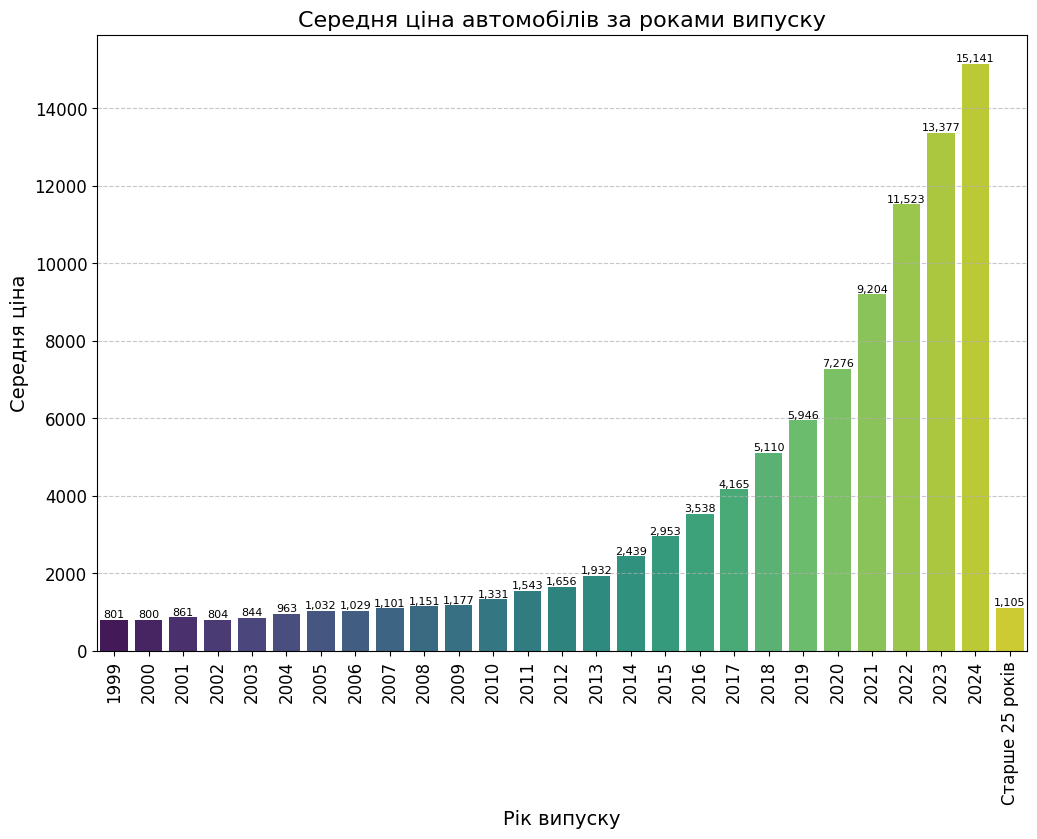

In [64]:
# Побудова стовпчастої діаграми для середньої ціни автомобілів за роками випуску
plt.figure(figsize=(12, 8))
avg_price_per_year_group = data_cleaned.groupby('year_group')['price'].mean().reset_index()
avg_price_per_year_group.columns = ['year_group', 'average_price']
ax = sns.barplot(x='year_group', y='average_price', data=avg_price_per_year_group, palette="viridis", hue='year_group', dodge=False, legend=False)
plt.title('Середня ціна автомобілів за роками випуску', fontsize=16)
plt.xlabel('Рік випуску', fontsize=14)
plt.ylabel('Середня ціна', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Додавання числових значень над стовпцями
for index, value in enumerate(avg_price_per_year_group['average_price']):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=8, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Аналіз даних продажів автомобілів на аукціоні показує, що найбільша кількість автомобілів була продана у 2016-2018 роках, після чого спостерігається поступове зниження. Ця тенденція може бути пов'язана з відновленням економіки після кризи 2008 року, розвитком автомобільних технологій, зміною споживчих уподобань та станом автомобілів, що продаються.

Щодо середньої ціни автомобілів на аукціоні, спостерігається стабільне зростання вартості з кожним роком. Найнижчі ціни на автомобілі, випущені до 2005 року, а найвищі - на автомобілі 2016-2018 років випуску. Зниження середньої ціни після 2018 року може бути пов'язане зі зносом та технічним станом автомобілів, попитом на новіші моделі, обмеженою пропозицією старих автомобілів та економічними факторами.

Таким чином, вік автомобіля є одним з ключових факторів, що впливають на його ціну на аукціоні. 

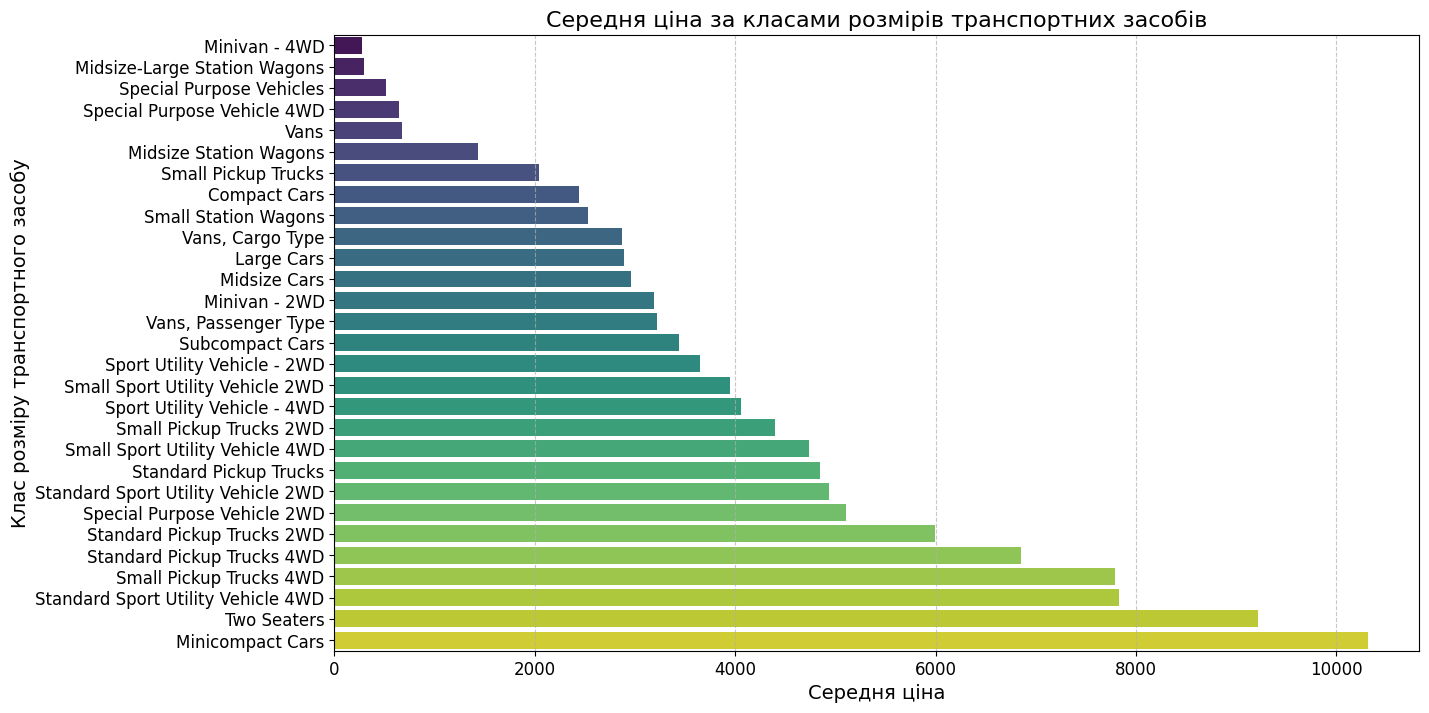

In [65]:
# Середня ціна за класами розмірів транспортних засобів
filtered_data = data_cleaned[data_cleaned['Vehicle Size Class'] != 'Unknown']
avg_price_by_size_class = filtered_data.groupby('Vehicle Size Class')['price'].mean().sort_values().reset_index()
avg_price_by_size_class.columns = ['Vehicle Size Class', 'average_price']

plt.figure(figsize=(14, 8))
sns.barplot(x='average_price', y='Vehicle Size Class', data=avg_price_by_size_class, palette="viridis", hue='Vehicle Size Class', dodge=False, legend=False)
plt.title('Середня ціна за класами розмірів транспортних засобів', fontsize=16)
plt.xlabel('Середня ціна', fontsize=14)
plt.ylabel('Клас розміру транспортного засобу', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


На графіку показано середню ціну транспортних засобів за їхніми класами розмірів. Найвищі середні ціни мають такі класи, як Minicompact Cars, Two Seaters, і Standard Sport Utility Vehicle 4WD. Це свідчить про те, що ці класи транспортних засобів, ймовірно, включають автомобілі з вищою ринковою вартістю та/або більш преміум-моделі. Найнижчі середні ціни спостерігаються у класів Minivan - 4WD, Midsize-Large Station Wagons, і Special Purpose Vehicles, що може вказувати на меншу вартість цих транспортних засобів або наявність у цих класах моделей старших років випуску або з меншою популярністю на ринку.

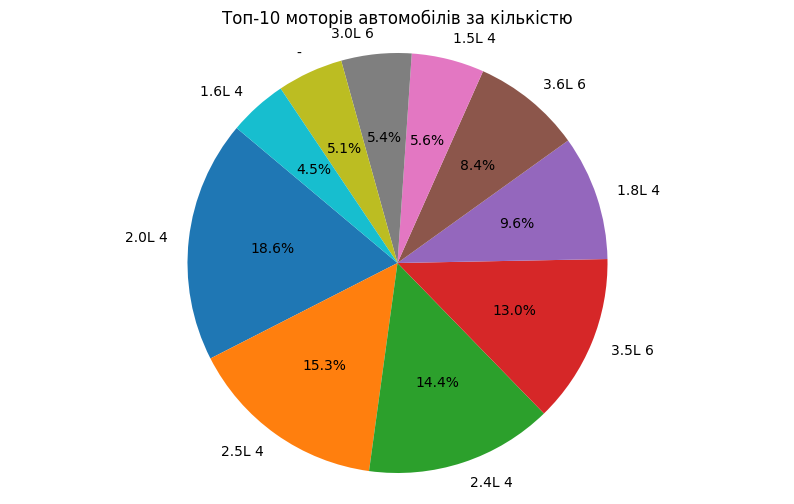

In [36]:
# Розрахунок топ-10 моторів за кількістю
top_10_engines = data_cleaned['Engine'].value_counts().nlargest(10)

# Побудова кругової діаграми
plt.figure(figsize=(10, 6))
plt.pie(top_10_engines, labels=top_10_engines.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-10 моторів автомобілів за кількістю')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

 Найбільш поширеним є двигун 2.0 л з 4 циліндрами, який займає 18,6% ринку. Далі йдуть двигуни 2.5 л з 4 циліндрами (15,3%) та 2.4 л з 4 циліндрами (14,4%).

Менш популярними, але все ще значущими на ринку, є двигуни 3.5 л з 6 циліндрами (13%), 1.8 л з 4 циліндрами (9,6%), 3.6 л з 6 циліндрами (8,4%) та 3.0 л з 6 циліндрами (5,6%).

Найменш поширеними серед топ-10 є двигуни 1.6 л з 4 циліндрами (5,1%), 1.5 л з 4 циліндрами (5,4%) та 3.0 л (4,5%).

Загалом, дані показують, що найбільшим попитом користуються двигуни з об'ємом 2.0-2.5 л та 4 циліндрами, що може свідчити про їх оптимальне співвідношення потужності, економічності та вартості.

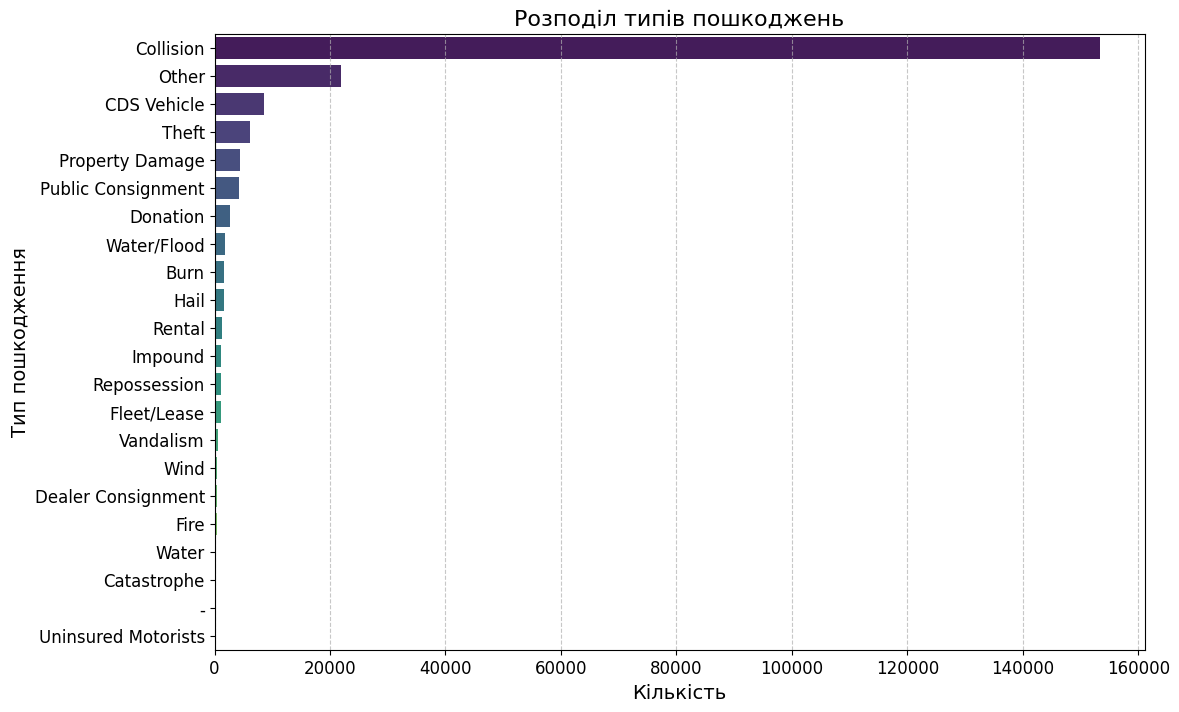

In [66]:
# Розподіл типів пошкоджень
damage_counts = data_cleaned['Type of damage'].value_counts().reset_index()
damage_counts.columns = ['Type of damage', 'count']

# Побудова стовпчастої діаграми
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='count', y='Type of damage', data=damage_counts, palette="viridis", hue='Type of damage', dodge=False, legend=False)
plt.title('Розподіл типів пошкоджень', fontsize=16)
plt.xlabel('Кількість', fontsize=14)
plt.ylabel('Тип пошкодження', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


На діаграмі представлено розподіл кількості автомобілів за типом пошкодження. Найбільша кількість автомобілів має пошкодження внаслідок зіткнення (Collision). Далі йдуть інші типи пошкоджень (Other), які включають різні причини, не зазначені окремо.

Менш поширеними, але все ще значущими є пошкодження, пов'язані з CDS Vehicle (автомобілі з пошкодженням від органів контролю), крадіжкою (Theft), пошкодженням майна (Property Damage), конфіскацією (Public Consignment), пожертвуванням (Donation), водою або повінню (Water/Flood).

Найменш поширеними серед представлених є пошкодження, пов'язані з пожежею (Burn, Fire), градом (Hail), орендою (Rental), вилученням (Impound, Repossession), парком/лізингом (Fleet/Lease), вандалізмом (Vandalism), вітром (Wind), дилерською консигнацією (Dealer Consignment), водою (Water), катастрофою (Catastrophe), незастрахованими автомобілістами (Uninsured Motorists).

Загалом, дані показують, що зіткнення є найпоширенішою причиною пошкодження автомобілів.

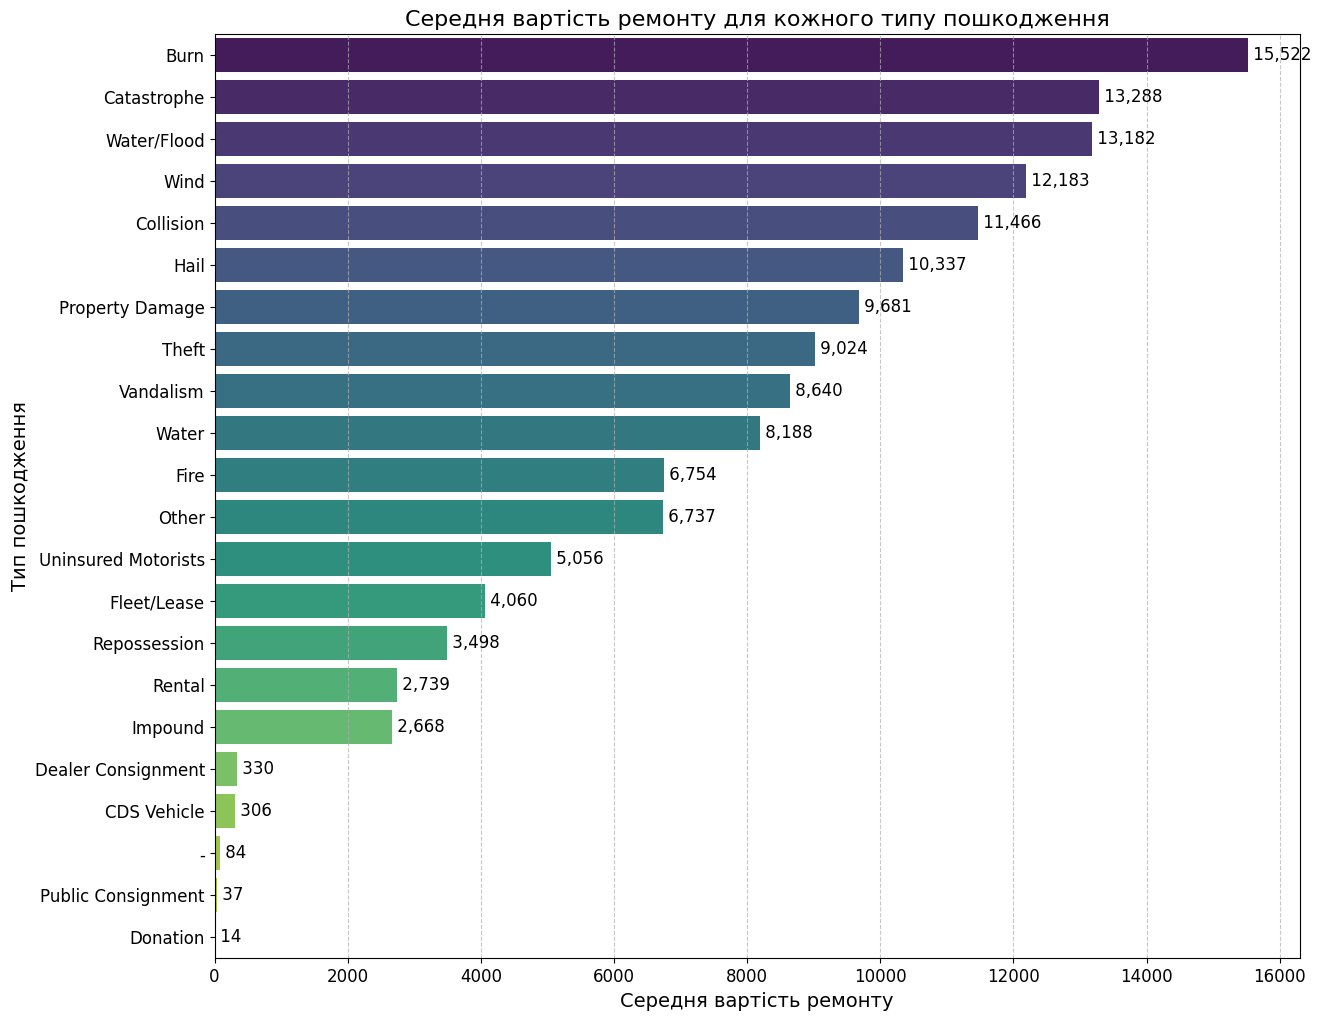

In [67]:
# Розрахунок середньої вартості ремонту для кожного типу пошкодження
avg_repair_cost_per_damage = data_cleaned.groupby('Type of damage')['Cost of repair'].mean().sort_values(ascending=False).reset_index()
avg_repair_cost_per_damage.columns = ['Type of damage', 'average_repair_cost']

# Побудова горизонтальної стовпчастої діаграми для середньої вартості ремонту для кожного типу пошкодження
plt.figure(figsize=(14, 12))
ax = sns.barplot(x='average_repair_cost', y='Type of damage', data=avg_repair_cost_per_damage, palette='viridis', hue='Type of damage', dodge=False, legend=False)
plt.title('Середня вартість ремонту для кожного типу пошкодження', fontsize=16)
plt.xlabel('Середня вартість ремонту', fontsize=14)
plt.ylabel('Тип пошкодження', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Додавання числових значень над стовпцями
for index, value in enumerate(avg_repair_cost_per_damage['average_repair_cost']):
    ax.text(value, index, f' {value:,.0f}', va='center', ha='left', fontsize=12, color='black')

plt.show()



Burn (пожежа) є найдорожчим типом пошкодження для ремонту, середня вартість якого перевищує 15,000 доларів.
Catastrophe (катастрофа) та Water/Flood (водяні пошкодження) також мають високу середню вартість ремонту, близько 13,000 доларів.
Collision (зіткнення) та Hail (град) мають значну середню вартість ремонту, що перевищує 10,000 доларів.
Найдешевшими типами пошкоджень для ремонту є Public Consignment (громадські консигнації) та Donation (пожертвування), вартість яких є значно нижчою порівняно з іншими типами.

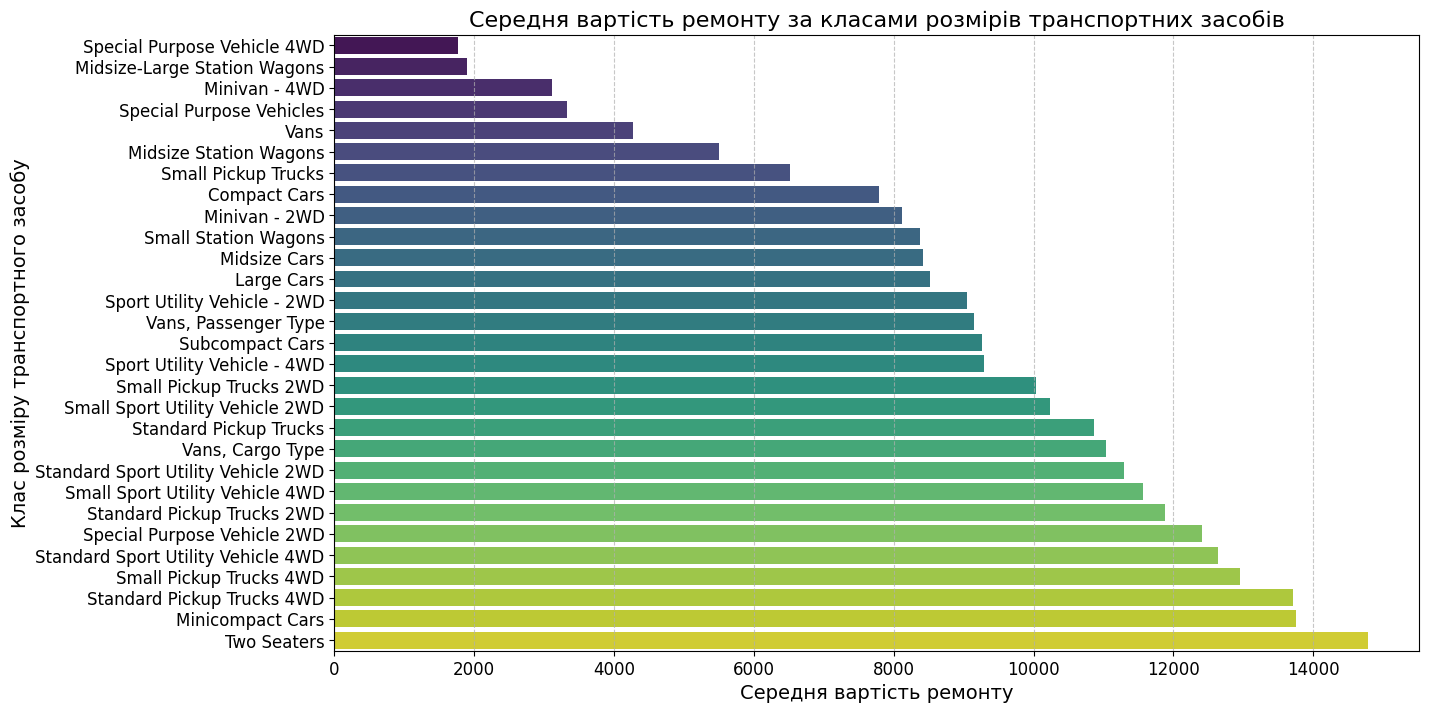

In [68]:
# Середня вартість ремонту за класами розмірів транспортних засобів
filtered_data = data_cleaned[data_cleaned['Vehicle Size Class'] != 'Unknown']
avg_repair_cost_by_size_class = filtered_data.groupby('Vehicle Size Class')['Cost of repair'].mean().sort_values().reset_index()
avg_repair_cost_by_size_class.columns = ['Vehicle Size Class', 'average_repair_cost']

plt.figure(figsize=(14, 8))
sns.barplot(x='average_repair_cost', y='Vehicle Size Class', data=avg_repair_cost_by_size_class, palette="viridis", hue='Vehicle Size Class', dodge=False, legend=False)
plt.title('Середня вартість ремонту за класами розмірів транспортних засобів', fontsize=16)
plt.xlabel('Середня вартість ремонту', fontsize=14)
plt.ylabel('Клас розміру транспортного засобу', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Середню вартість ремонту транспортних засобів за їхніми класами розмірів. Найвищі середні витрати на ремонт спостерігаються у класів Two Seaters, Minicompact Cars, і Standard Pickup Trucks 4WD. Це може свідчити про те, що ремонт цих транспортних засобів складніший та дорожчий через їх конструктивні особливості, вартість запчастин або спеціалізоване обслуговування. Найнижчі середні витрати на ремонт мають класи Special Purpose Vehicle 4WD, Midsize-Large Station Wagons, і Minivan - 4WD, що може вказувати на менш складний або менш витратний ремонт цих транспортних засобів.

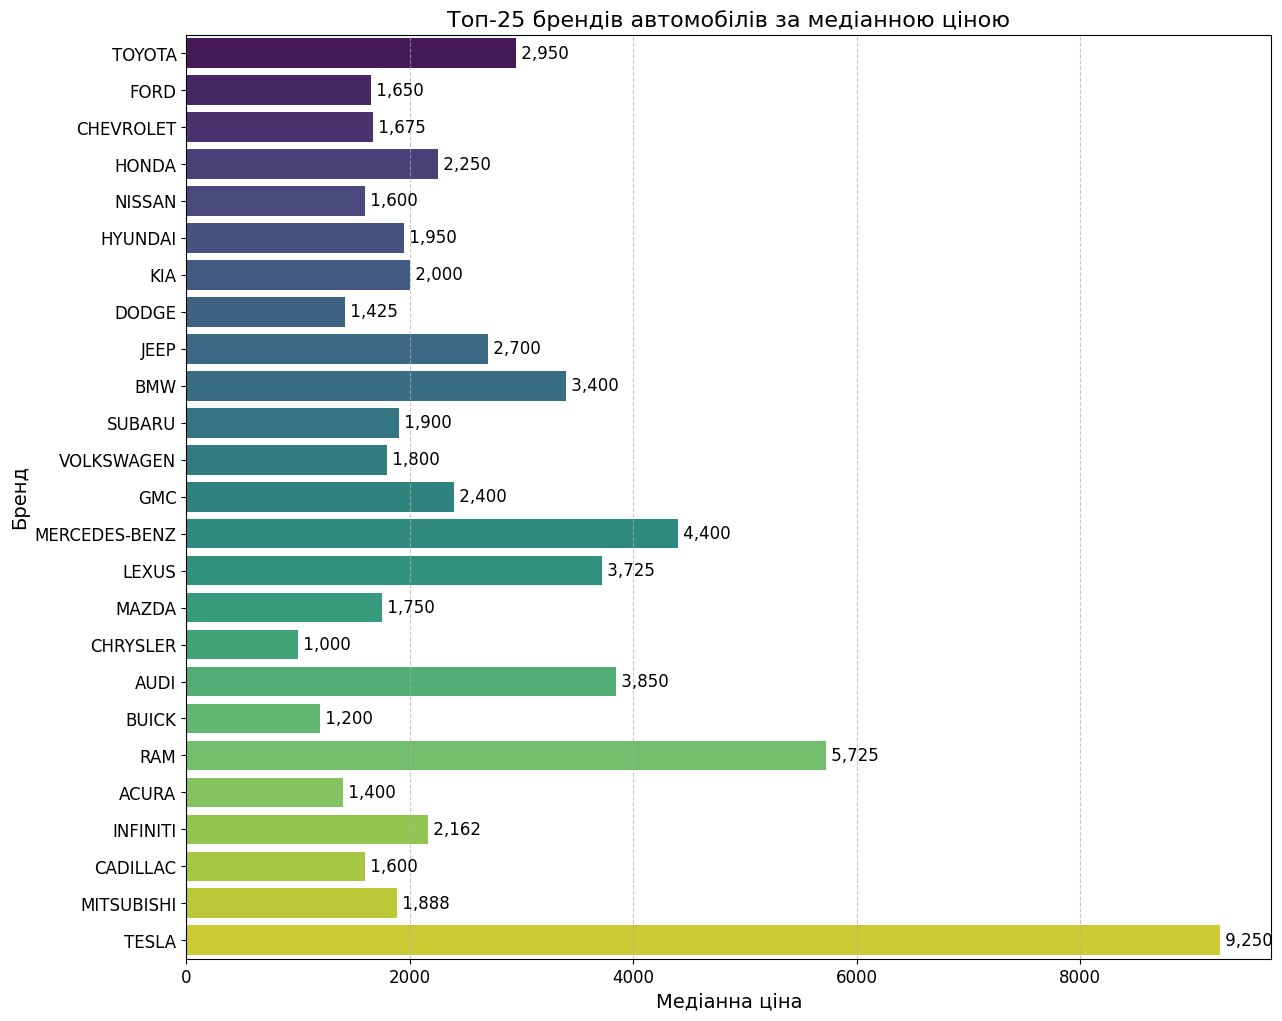

In [69]:
# Розрахунок топ-25 брендів за медіанною ціною автомобілів
# Визначення топ-25 марок
top_25_brands = data_cleaned['brand'].value_counts().nlargest(25).index
# Фільтрація даних за топ-25 брендами
data_top_25_brands = data_cleaned[data_cleaned['brand'].isin(top_25_brands)]

# Розрахунок медіанної ціни для топ-25 брендів
median_price_top_25_brands = data_top_25_brands.groupby('brand')['price'].median().loc[top_25_brands].reset_index()
median_price_top_25_brands.columns = ['brand', 'median_price']

# Побудова горизонтальної стовпчастої діаграми для медіанних цін топ-25 брендів
plt.figure(figsize=(14, 12))
ax = sns.barplot(x='median_price', y='brand', data=median_price_top_25_brands, palette="viridis", hue='brand', dodge=False, legend=False)
plt.title('Топ-25 брендів автомобілів за медіанною ціною', fontsize=16)
plt.xlabel('Медіанна ціна', fontsize=14)
plt.ylabel('Бренд', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Додавання числових значень над стовпцями
for index, value in enumerate(median_price_top_25_brands['median_price']):
    ax.text(value, index, f' {value:,.0f}', va='center', ha='left', fontsize=12, color='black')

plt.show()


Tesla є найдорожчим брендом з медіанною ціною майже 9250 USD, тоді як Сhrysler та Dodge – найбюджетніші, не перевищуючи 1500 USD. Більшість брендів знаходяться в середньому ціновому сегменті (1500-4000 USD), що свідчить про широкий вибір для покупців з різним бюджетом. Преміальний сегмент представлений брендами Mercedes-Benz, BMW, Audi та Lexus. Японські бренди (Toyota, Honda, Nissan, Mazda, Subaru, Mitsubishi) домінують в середньому ціновому сегменті, пропонуючи доступні автомобілі з гарним співвідношенням ціни та якості. Американські бренди представлені у всіх цінових сегментах: від бюджетних (Chevrolet, Ford, Dodge) до преміальних (Cadillac, Buick) та пікапів (GMC, Ram). Європейські бренди в основному представлені у преміальному сегменті (Mercedes-Benz, BMW, Audi та Volkswagen), тоді як корейські бренди Kia та Hyundai пропонують автомобілі в середньому ціновому сегменті.


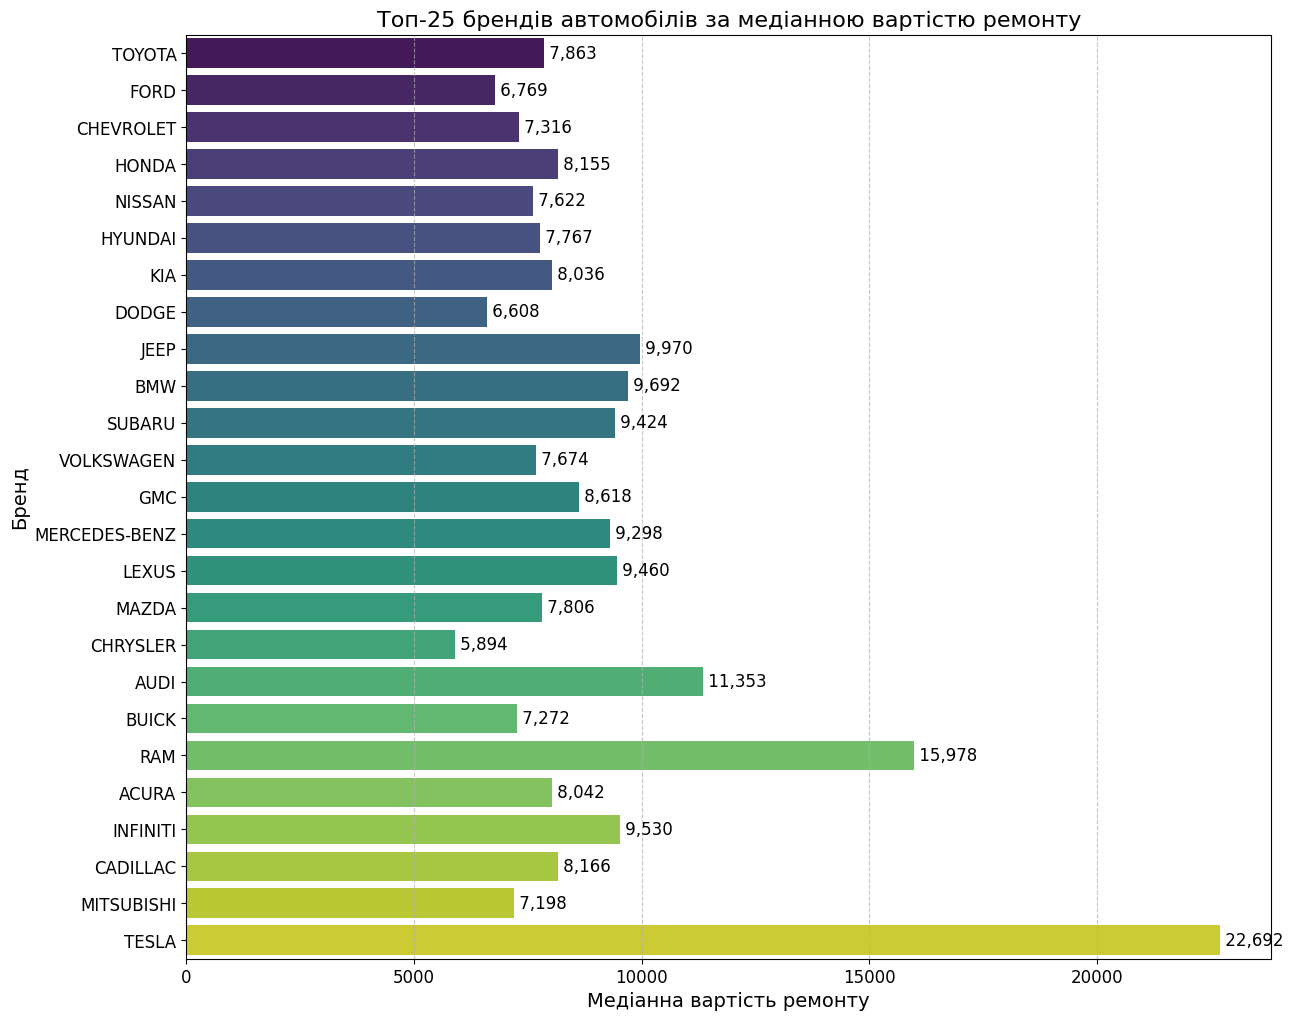

In [70]:
# Розрахунок медіанної вартості ремонту для топ-25 брендів
median_repair_cost_top_25_brands = data_top_25_brands.groupby('brand')['Cost of repair'].median().loc[top_25_brands].reset_index()
median_repair_cost_top_25_brands.columns = ['brand', 'median_repair_cost']

# Побудова горизонтальної стовпчастої діаграми для медіанних вартостей ремонту топ-25 брендів
plt.figure(figsize=(14, 12))
ax = sns.barplot(x='median_repair_cost', y='brand', data=median_repair_cost_top_25_brands, palette="viridis", hue='brand', dodge=False, legend=False)
plt.title('Топ-25 брендів автомобілів за медіанною вартістю ремонту', fontsize=16)
plt.xlabel('Медіанна вартість ремонту', fontsize=14)
plt.ylabel('Бренд', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Додавання числових значень над стовпцями
for index, value in enumerate(median_repair_cost_top_25_brands['median_repair_cost']):
    ax.text(value, index, f' {value:,.0f}', va='center', ha='left', fontsize=12, color='black')

plt.show()


Знову Tesla є найдорожчим брендом в обслуговуванні з медіанною вартістю ремонту майже 22 692 USD, тоді як Chrysler та Ford є найдоступнішими, не перевищуючи 6000 USD. Більшість брендів знаходяться в середньому ціновому сегменті (6000-10 000 USD), що свідчить про широкий вибір для власників з різним бюджетом на обслуговування. Преміальні бренди (Mercedes-Benz, BMW, Audi, Lexus, Infiniti) дорожчі в обслуговуванні, ніж масові. Японські бренди (Toyota, Honda, Nissan, Mazda, Subaru, Mitsubishi) пропонують автомобілі з відносно невисокою вартістю ремонту. Американські бренди представлені у всіх цінових сегментах: від доступних (Ford, Chrysler, Dodge) до дорогих (Jeep, Ram) та преміальних (Cadillac, Buick). Європейські бренди в основному дорожчі в обслуговуванні (Mercedes-Benz, BMW, Audi, Volkswagen), тоді як корейські бренди Kia та Hyundai пропонують автомобілі з відносно доступним обслуговуванням.

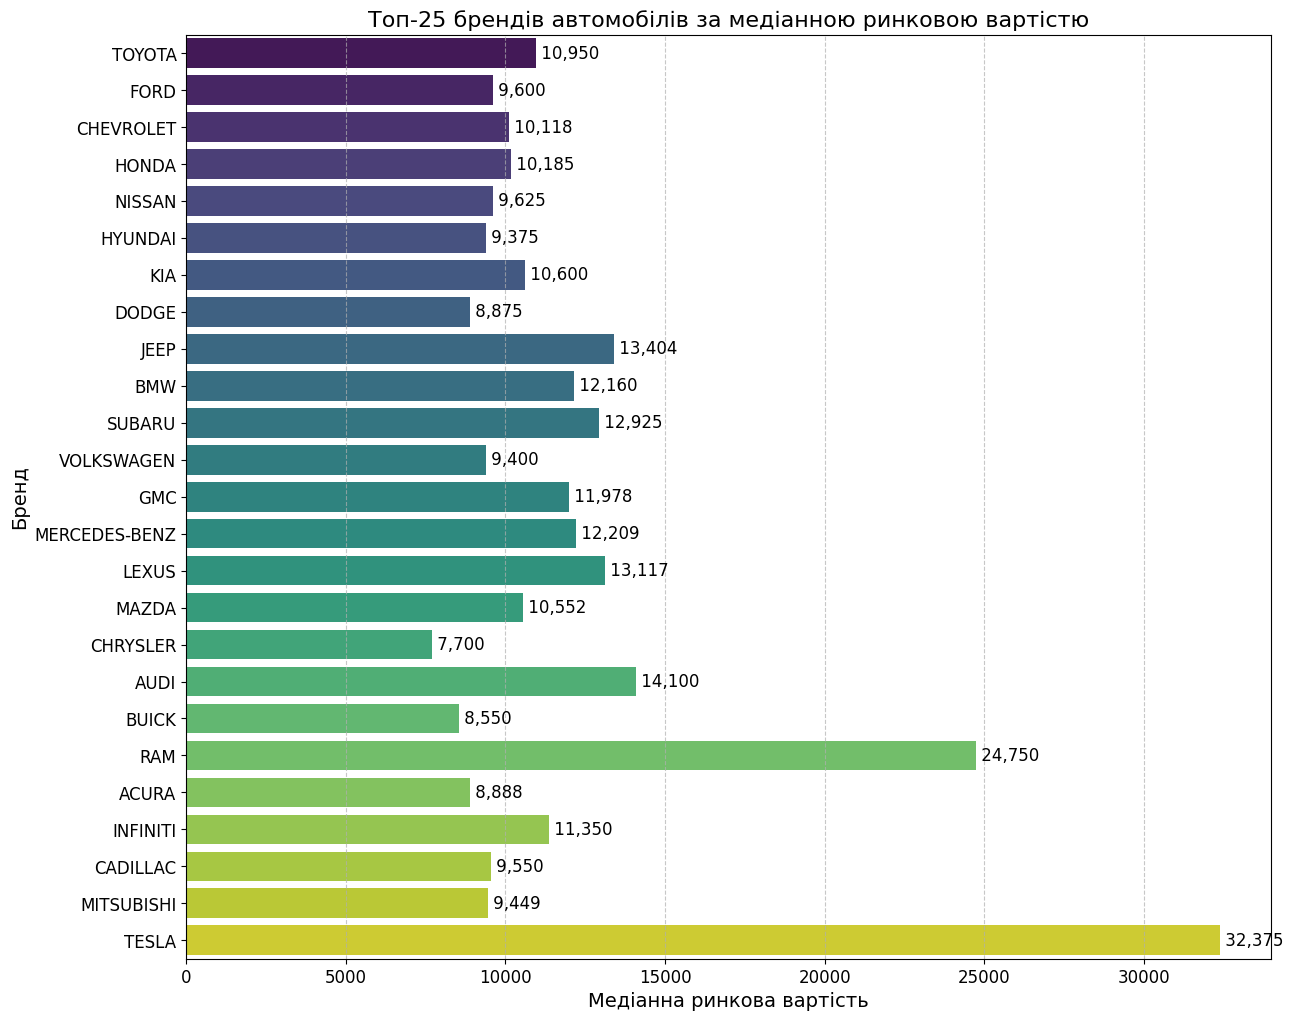

In [71]:
# Розрахунок медіанної ринкової вартості для топ-25 брендів
median_market_value_top_25_brands = data_top_25_brands.groupby('brand')['Market value'].median().loc[top_25_brands].reset_index()
median_market_value_top_25_brands.columns = ['brand', 'median_market_value']

# Побудова горизонтальної стовпчастої діаграми для медіанних ринкових вартостей топ-25 брендів
plt.figure(figsize=(14, 12))
ax = sns.barplot(x='median_market_value', y='brand', data=median_market_value_top_25_brands, palette="viridis", hue='brand', dodge=False, legend=False)
plt.title('Топ-25 брендів автомобілів за медіанною ринковою вартістю', fontsize=16)
plt.xlabel('Медіанна ринкова вартість', fontsize=14)
plt.ylabel('Бренд', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Додавання числових значень над стовпцями
for index, value in enumerate(median_market_value_top_25_brands['median_market_value']):
    ax.text(value, index, f' {value:,.0f}', va='center', ha='left', fontsize=12, color='black')

plt.show()


Топ-25 брендів автомобілів за медіанною ринковою вартістю демонструє значну різницю в цінах між брендами. Tesla лідирує з медіанною ринковою вартістю близько 32 375 USD, тоді як Chrysler займає останнє місце з вартістю не більше 7 700 доларів. Більшість брендів розташовані в середньому ціновому діапазоні (9000-13 000 USD), пропонуючи різноманітні варіанти для покупців з різним бюджетом. Преміальні бренди, такі як Mercedes-Benz, BMW, Audi та Lexus, очікувано мають вищу вартість, ніж масові бренди. Японські бренди (Toyota, Honda, Nissan, Mazda, Subaru) відзначаються доступністю, тоді як американські бренди представлені у всіх цінових категоріях: від бюджетних (Ford, Chevrolet, Dodge) до преміальних (Cadillac, Buick) та спеціалізованих (Jeep, Ram). Європейські бренди переважно займають преміальний сегмент (Mercedes-Benz, BMW, Audi, Volkswagen), а корейські бренди Kia та Hyundai пропонують моделі в середньому ціновому діапазоні.

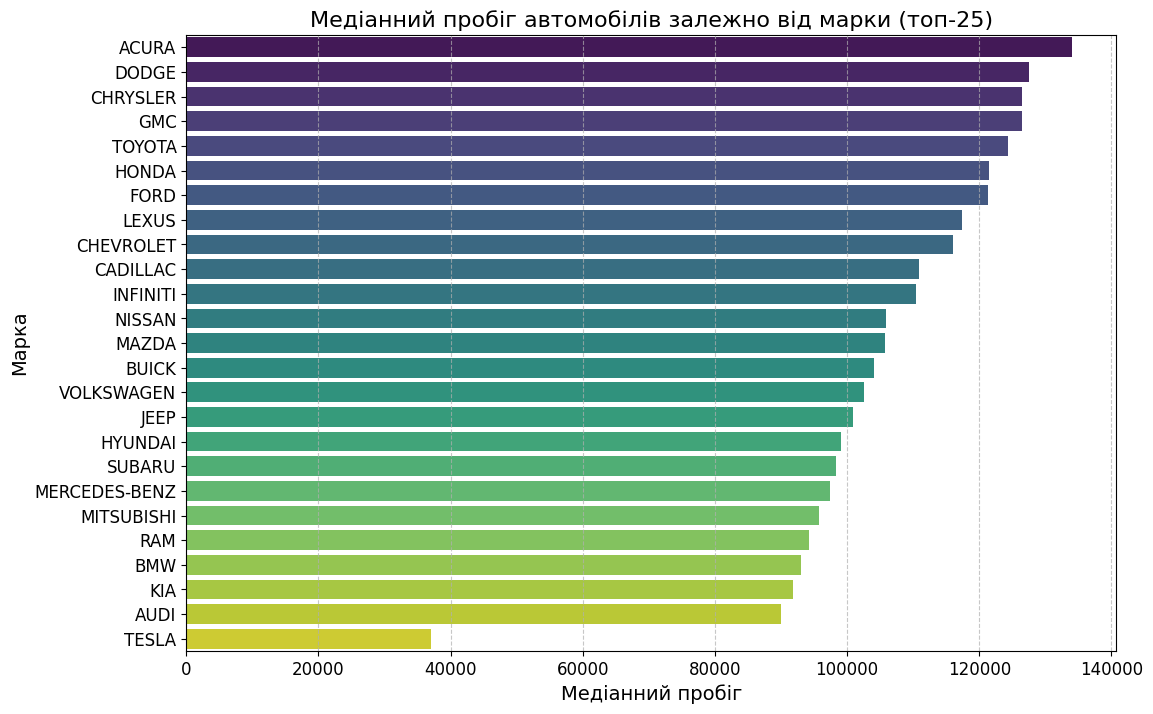

In [74]:
# Визначення топ-25 марок
top_25_brands = data_cleaned['brand'].value_counts().nlargest(25).index

# Фільтрація даних за топ-25 марками
data_top_25_brands = data_cleaned[data_cleaned['brand'].isin(top_25_brands)]

# Розрахунок медіанного пробігу для кожної марки
median_mileage = data_top_25_brands.groupby('brand')['Mileage'].median().sort_values(ascending=False).reset_index()
median_mileage.columns = ['brand', 'median_mileage']

# Побудова стовпчастої діаграми для медіанного пробігу
plt.figure(figsize=(12, 8))
sns.barplot(x='median_mileage', y='brand', data=median_mileage, palette="viridis", hue='brand', dodge=False, legend=False)
plt.title('Медіанний пробіг автомобілів залежно від марки (топ-25)', fontsize=16)
plt.xlabel('Медіанний пробіг', fontsize=14)
plt.ylabel('Марка', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Acura має найбільший медіанний пробіг, тоді як Tesla – найменший. Японські бренди (Toyota, Honda, Nissan, Mazda, Subaru, Mitsubishi) демонструють високий медіанний пробіг, підтверджуючи свою репутацію надійних та довговічних автомобілів. Американські бренди (Ford, Chevrolet, GMC, Dodge, Jeep, Ram) мають середній медіанний пробіг, що вказує на їх різноманітність та призначення для різних потреб. Європейські бренди (Mercedes-Benz, BMW, Audi, Volkswagen) також мають середній та високий медіанний пробіг, що свідчить про їх якість та довговічність, особливо у преміальному сегменті. Корейські бренди (Hyundai, Kia) демонструють високий медіанний пробіг, підтверджуючи свою конкурентоспроможність та зростаючу популярність. Загалом, графік демонструє, що медіанний пробіг автомобілів суттєво залежить від марки та моделі, відображаючи різницю в їх якості, довговічності та призначенні.

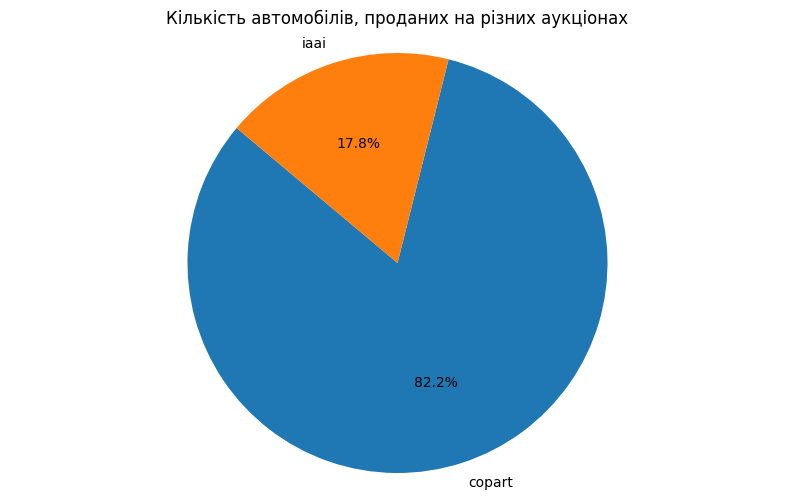

In [44]:
# Розрахунок кількості автомобілів за аукціонами
auction_counts = data_cleaned['auction'].value_counts()

# Побудова кругової діаграми
plt.figure(figsize=(10, 6))
plt.pie(auction_counts, labels=auction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Кількість автомобілів, проданих на різних аукціонах')
plt.axis('equal')  # Забезпечує рівний аспект для правильного кола
plt.show()

Кругова діаграма демонструє значну перевагу Copart над IAAI на ринку аукціонних продажів автомобілів, з частками 82,2% та 17,8% відповідно. Це свідчить про те, що Copart є більш популярним вибором серед покупців, можливо, завдяки ширшому вибору автомобілів, привабливішим умовам або кращій репутації.

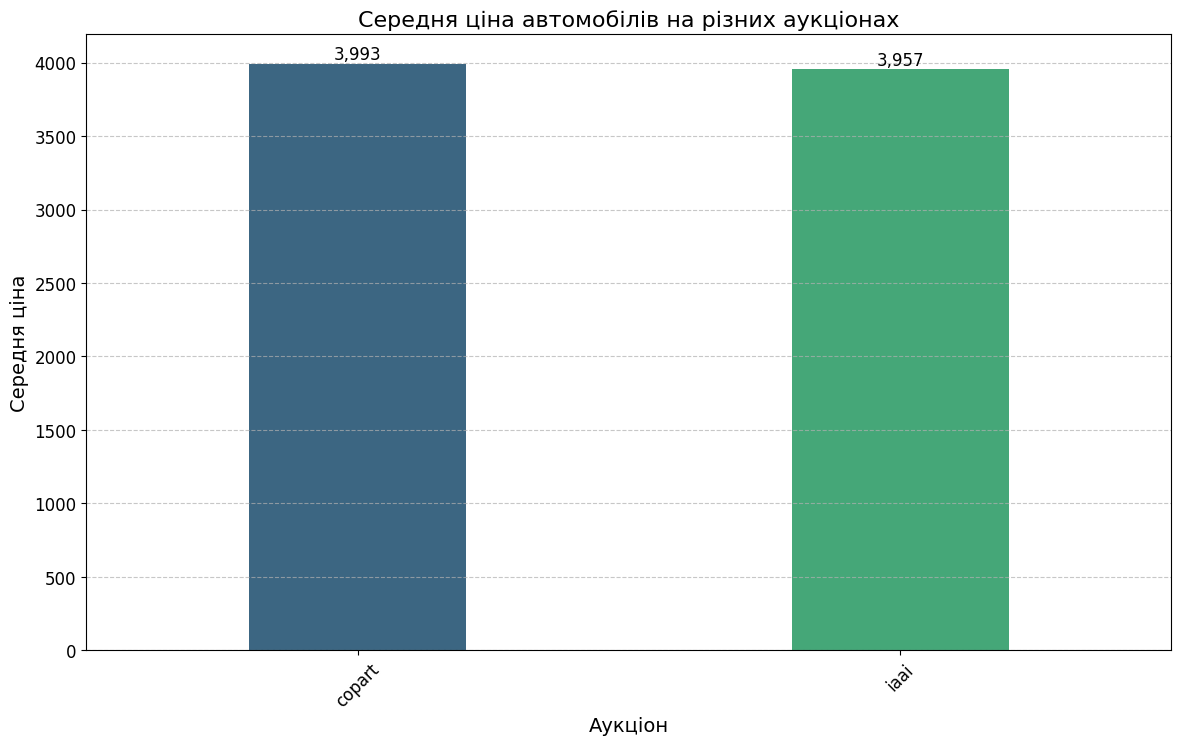

In [75]:
# Розрахунок середньої ціни автомобілів для кожного аукціону
avg_price_per_auction = data_cleaned.groupby('auction')['price'].mean().reset_index()
avg_price_per_auction.columns = ['auction', 'average_price']

# Побудова вертикальної стовпчастої діаграми для середніх цін автомобілів на різних аукціонах
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='auction', y='average_price', data=avg_price_per_auction, palette="viridis", width=0.4, hue='auction', dodge=False, legend=False)
plt.title('Середня ціна автомобілів на різних аукціонах', fontsize=16)
plt.xlabel('Аукціон', fontsize=14)
plt.ylabel('Середня ціна', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Додавання числових значень над стовпцями
for index, value in enumerate(avg_price_per_auction['average_price']):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


Різниця в середній ціні між двома аукціонами становить лише 36 доларів, що є незначною сумою в порівнянні із загальною вартістю автомобіля.
Отже, вибір аукціону (Copart чи IAAI) для купівлі автомобіля не повинен базуватися лише на середній ціні, оскільки вона майже однакова. Інші фактори, такі як асортимент автомобілів, стан автомобілів, додаткові послуги та місце розташування аукціону, можуть мати більше значення при прийнятті рішення.

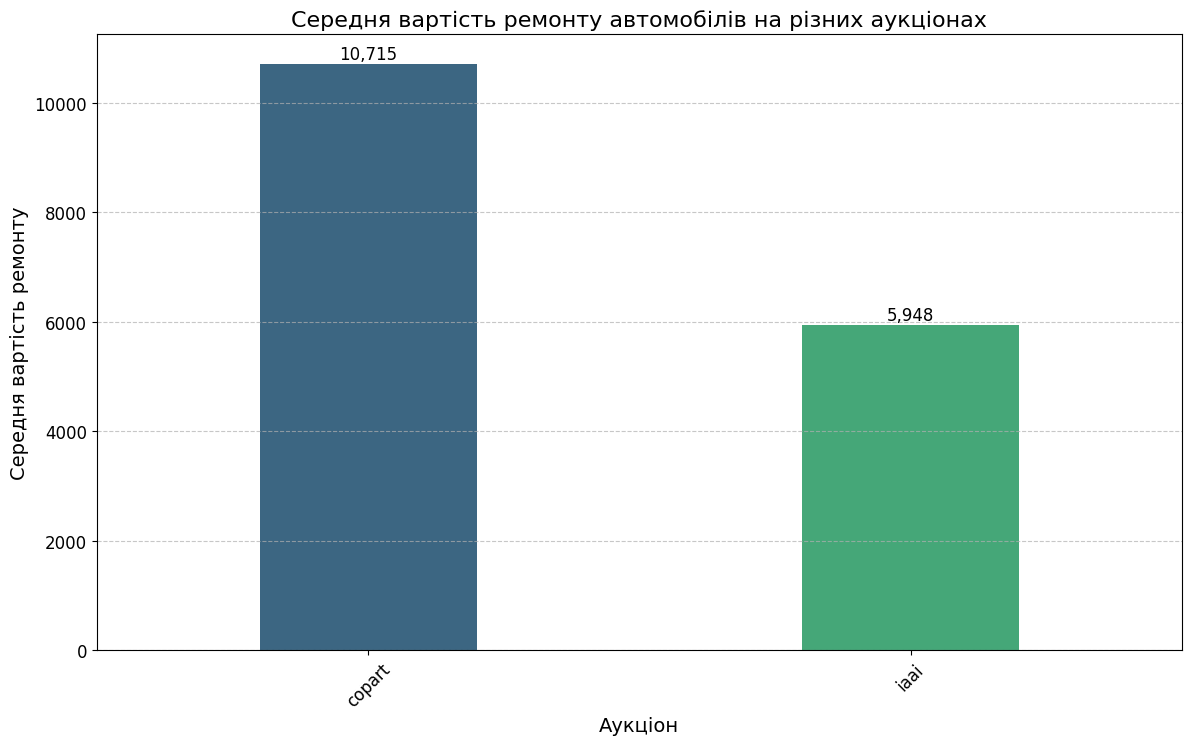

In [76]:
# Розрахунок середньої вартості ремонту автомобілів для кожного аукціону
avg_repair_cost_per_auction = data_cleaned.groupby('auction')['Cost of repair'].mean().reset_index()
avg_repair_cost_per_auction.columns = ['auction', 'average_repair_cost']

# Побудова вертикальної стовпчастої діаграми для середньої вартості ремонту автомобілів на різних аукціонах
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='auction', y='average_repair_cost', data=avg_repair_cost_per_auction, palette="viridis", width=0.4, hue='auction', dodge=False, legend=False)
plt.title('Середня вартість ремонту автомобілів на різних аукціонах', fontsize=16)
plt.xlabel('Аукціон', fontsize=14)
plt.ylabel('Середня вартість ремонту', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Додавання числових значень над стовпцями
for index, value in enumerate(avg_repair_cost_per_auction['average_repair_cost']):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


Середня вартість ремонту автомобіля, придбаного на аукціоні Copart, майже вдвічі вища, ніж вартість ремонту автомобіля з IAAI (10 715 доларів проти 5 948 доларів). Це може бути пов'язано з тим, що автомобілі на Copart мають більш серйозні пошкодження, є більш дорогими або складними моделями, або аукціони розташовані в регіонах з різною вартістю ремонту. 

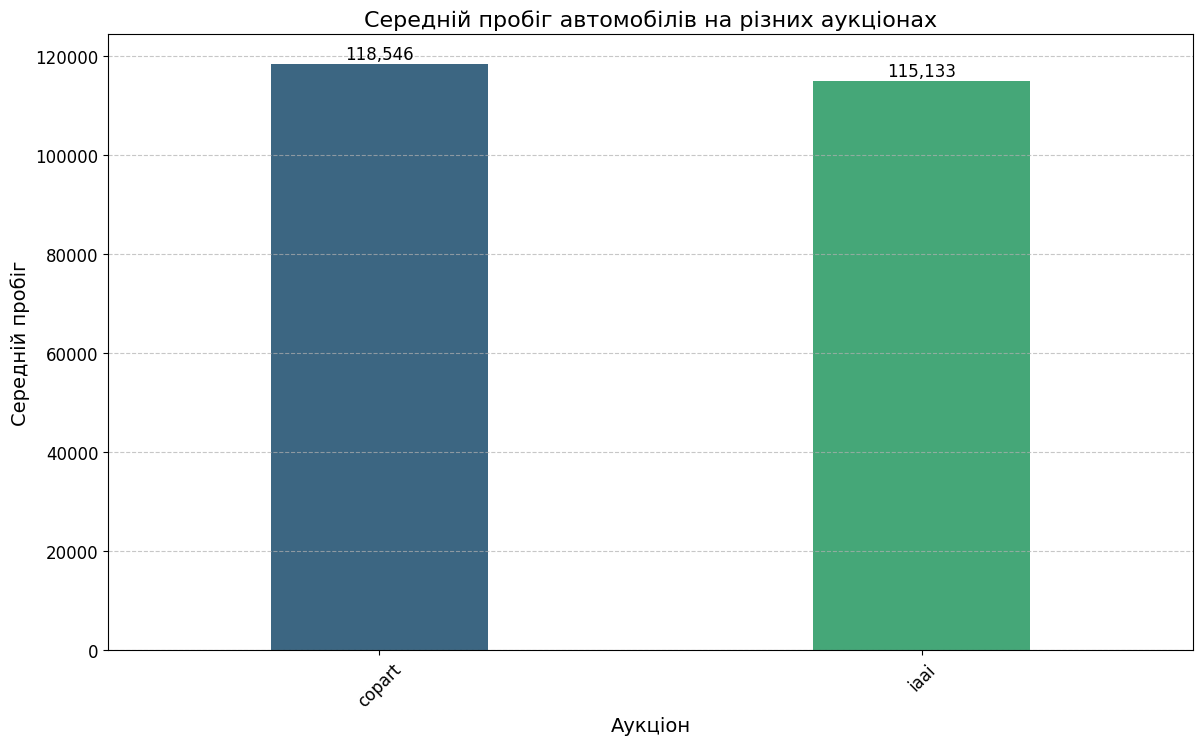

In [77]:
# Розрахунок середнього пробігу автомобілів для кожного аукціону
avg_mileage_per_auction = data_cleaned.groupby('auction')['Mileage'].mean().reset_index()
avg_mileage_per_auction.columns = ['auction', 'average_mileage']

# Побудова вертикальної стовпчастої діаграми для середнього пробігу автомобілів на різних аукціонах
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='auction', y='average_mileage', data=avg_mileage_per_auction, palette="viridis", width=0.4, hue='auction', dodge=False, legend=False)
plt.title('Середній пробіг автомобілів на різних аукціонах', fontsize=16)
plt.xlabel('Аукціон', fontsize=14)
plt.ylabel('Середній пробіг', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Додавання числових значень над стовпцями
for index, value in enumerate(avg_mileage_per_auction['average_mileage']):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


На діаграмі "Середній пробіг автомобілів на різних аукціонах" видно, що середній пробіг автомобілів на аукціоні IAAI (115,133) трохи вищий, ніж на аукціоні Copart (118,546). Різниця між середнім пробігом на цих двох аукціонах невелика. Це свідчить про те, що обидва аукціони пропонують автомобілі з приблизно однаковим ступенем зносу.

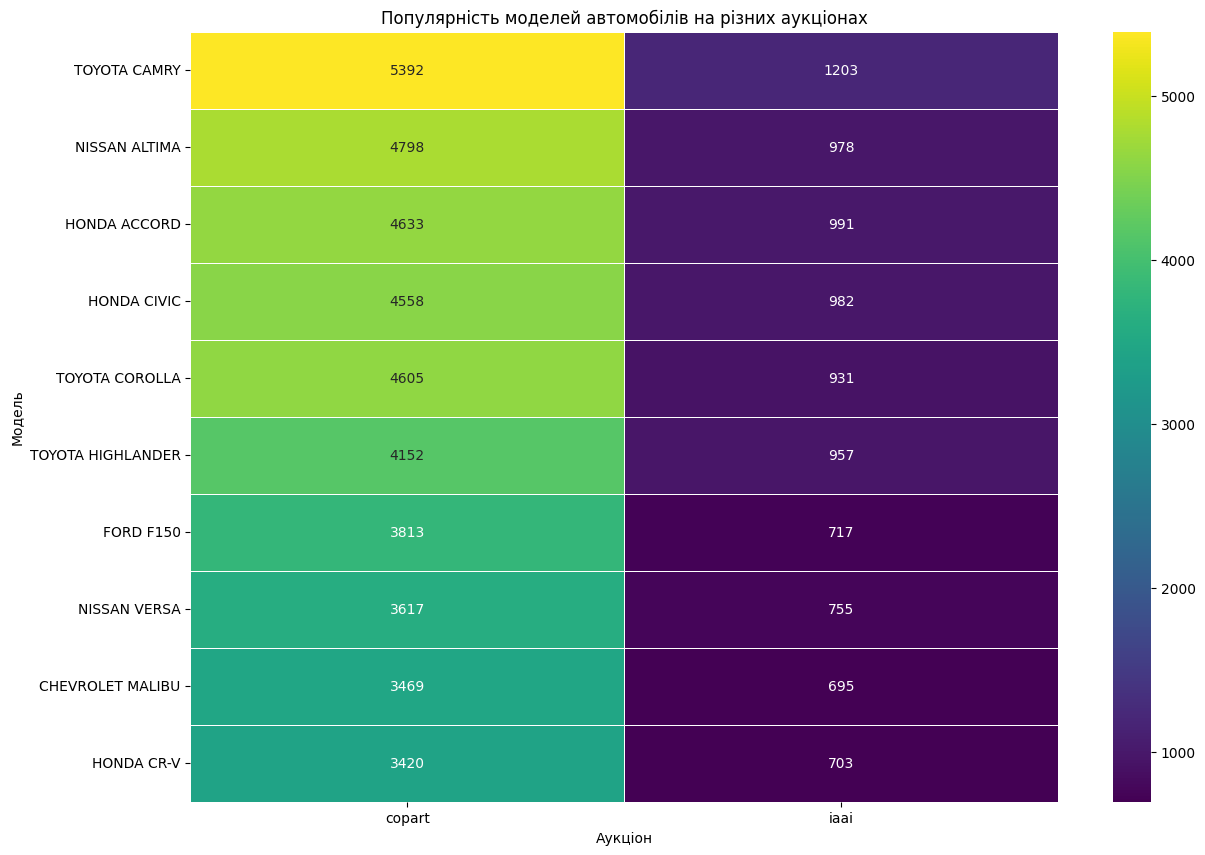

In [48]:
# Зведена таблиця з кількістю автомобілів кожної моделі для кожного аукціону
model_counts_per_auction = data_cleaned.pivot_table(index='model', columns='auction', aggfunc='size', fill_value=0)

# Вибір топ-10 моделей для кожного аукціону
top_models_per_auction = model_counts_per_auction.apply(lambda x: x.nlargest(10).index, axis=0).values.flatten()
top_models_per_auction = pd.Index(top_models_per_auction).unique()

# Фільтрація даних для топ-10 моделей
filtered_model_counts_per_auction = model_counts_per_auction.loc[top_models_per_auction]

# Побудова теплової карти
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_model_counts_per_auction, annot=True, fmt='d', cmap='viridis', linewidths=0.5)
plt.title('Популярність моделей автомобілів на різних аукціонах')
plt.xlabel('Аукціон')
plt.ylabel('Модель')
plt.show()

На основі діаграми "Популярність моделей автомобілів на різних аукціонах" можна зробити такі висновки:

Toyota Camry є найпопулярнішою моделлю на обох аукціонах, Copart та IAAI.
Copart має значно більшу кількість продажів для всіх представлених моделей, порівняно з IAAI.
Honda Civic та Toyota Corolla мають приблизно однакову популярність на обох аукціонах.
Ford F-150 є найпопулярнішою моделлю пікапа на Copart, але на IAAI він значно менш популярний.
Chevrolet Malibu та Honda CR-V мають найменшу популярність на обох аукціонах, порівняно з іншими моделями.
Загалом, діаграма показує, що Copart є більш популярним аукціоном для більшості представлених моделей автомобілів, особливо для Toyota Camry та Ford F-150. Однак, деякі моделі, такі як Honda Civic та Toyota Corolla, мають приблизно однакову популярність на обох аукціонах.

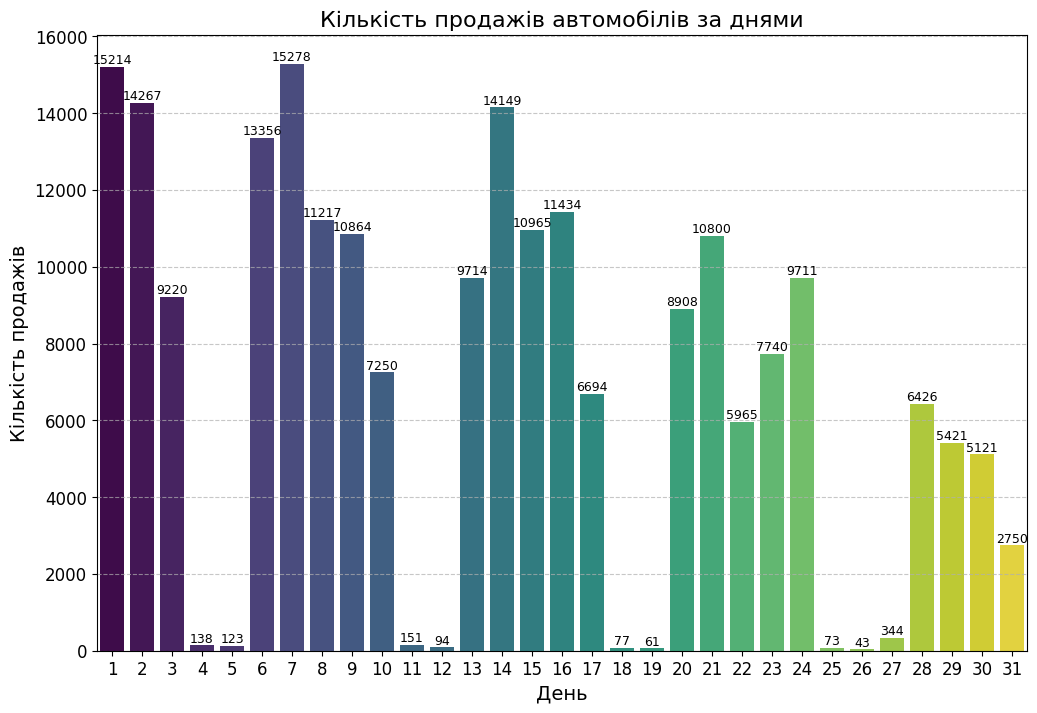

In [78]:
# Додавання стовпця з днем продажу
data_cleaned['Auction Day'] = data_cleaned['Auction Date'].dt.day

# Підрахунок кількості продажів за днями
sales_per_day = data_cleaned['Auction Day'].value_counts().sort_index().reset_index()
sales_per_day.columns = ['Auction Day', 'sales_count']

# Побудова графіку
plt.figure(figsize=(12, 8))
sns.barplot(x='Auction Day', y='sales_count', data=sales_per_day, palette="viridis", hue='Auction Day', dodge=False, legend=False)
plt.title('Кількість продажів автомобілів за днями', fontsize=16)
plt.xlabel('День', fontsize=14)
plt.ylabel('Кількість продажів', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Додавання числових значень над стовпцями
for index, value in enumerate(sales_per_day['sales_count']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=9, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Можна зробити висновок, що продажі автомобілів протягом місяця мають два піки: на початку (1-2 день) та в середині місяця (14-15 день), що може бути пов'язано з виплатою зарплат, маркетинговими акціями або сезонними змінами попиту. Найменша кількість продажів спостерігається в кінці місяця, особливо в останні дні (29-31), можливо, через те, що покупці вже зробили покупки раніше або дилери знижують активність. Найменша кількість продажів спостерігається в кінці місяця, особливо в останні дні (29-31). Це може бути обумовлено завершенням звітного періоду у аукціонів, коли вони зосереджуються на підведенні підсумків та плануванні наступного місяця, а не на активному залученні нових клієнтів. Також, це може бути пов'язано з психологічним фактором, коли покупці відкладають великі покупки на початок місяця, сподіваючись на появу нових моделей або вигідніших пропозицій.Протягом більшої частини місяця кількість продажів залишається стабільною, з невеликими коливаннями, що свідчить про стабільний попит.

C:\Users\Eugene\AppData\Local\Temp\ipykernel_6168\2427932253.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = data_cleaned.groupby('value_segment').agg({
C:\Users\Eugene\AppData\Local\Temp\ipykernel_6168\2427932253.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value_segment', y='price', data=segment_analysis, palette="viridis")
C:\Users\Eugene\AppData\Local\Temp\ipykernel_6168\2427932253.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value_segment', y='Cost of 

  value_segment         price  Cost of repair        Mileage
0         <5000   2619.557322     6700.335728  155736.874870
1    5000-10000   1284.836914     5730.130118  148821.262761
2   10000-20000   3292.527711    10177.365238  105661.935831
3   20000-50000   8925.759800    17011.357686   60592.071421
4  50000-100000  23668.948047    31559.095942   58261.976734
5       >100000  49439.880952    54848.738095   25308.829787


C:\Users\Eugene\AppData\Local\Temp\ipykernel_6168\2427932253.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value_segment', y='Mileage', data=segment_analysis, palette="viridis")


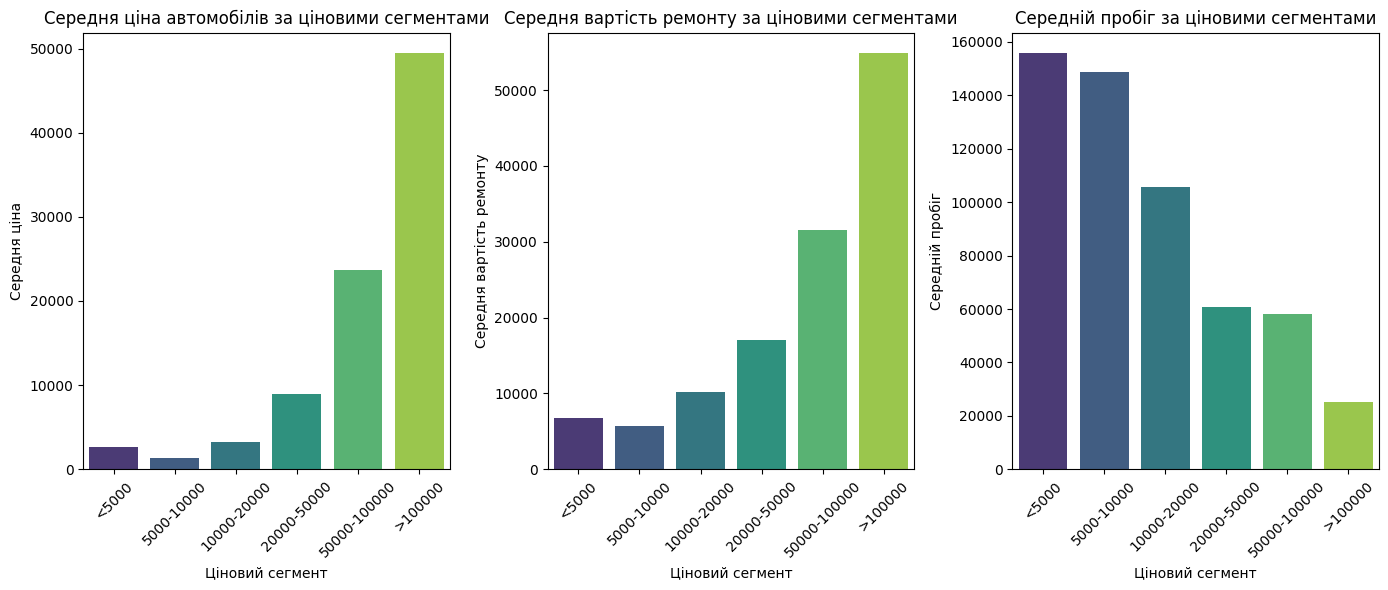

In [94]:
#Розділення на цінові сегменти
bins = [0, 5000, 10000, 20000, 50000, 100000, data_cleaned['Market value'].max()]
labels = ['<5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '>100000']
data_cleaned['value_segment'] = pd.cut(data_cleaned['Market value'], bins=bins, labels=labels, right=False)

#Аналіз середніх значень для кожного сегменту
segment_analysis = data_cleaned.groupby('value_segment').agg({
'price': 'mean',
'Cost of repair': 'mean',
'Mileage': 'mean'
}).reset_index()

#Виведення результатів аналізу
print(segment_analysis)

#Побудова графіків для кожної характеристики
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='value_segment', y='price', data=segment_analysis, palette="viridis")
plt.title('Середня ціна автомобілів за ціновими сегментами')
plt.xlabel('Ціновий сегмент')
plt.ylabel('Середня ціна')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='value_segment', y='Cost of repair', data=segment_analysis, palette="viridis")
plt.title('Середня вартість ремонту за ціновими сегментами')
plt.xlabel('Ціновий сегмент')
plt.ylabel('Середня вартість ремонту')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='value_segment', y='Mileage', data=segment_analysis, palette="viridis")
plt.title('Середній пробіг за ціновими сегментами')
plt.xlabel('Ціновий сегмент')
plt.ylabel('Середній пробіг')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Аналіз діаграм "Середня ціна автомобілів", "Середня вартість ремонту" та "Середній пробіг за ціновими сегментами" показує, що зі збільшенням цінового сегмента автомобіля зростає його середня ціна та вартість ремонту, але зменшується середній пробіг. Це свідчить про те, що дорожчі автомобілі є новішими, менше експлуатуються та потребують дорожчого обслуговування, ніж бюджетніші моделі.

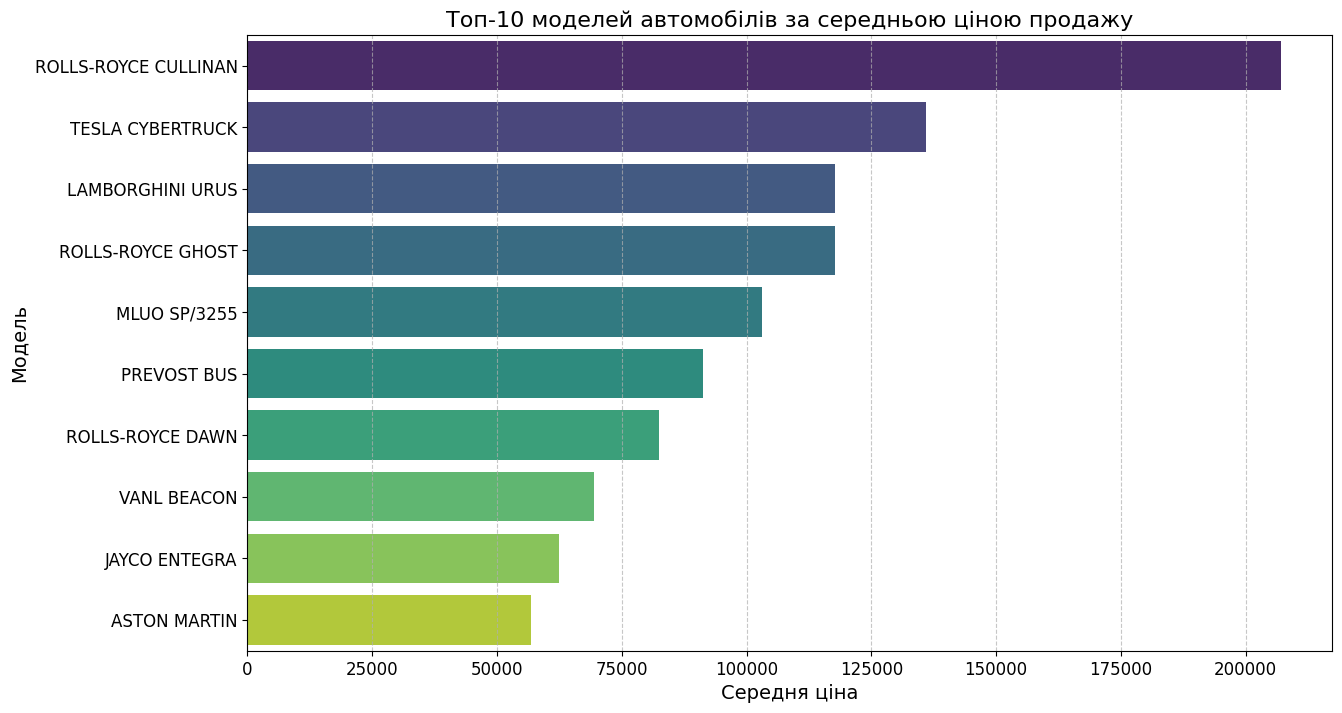

In [83]:
# Аналіз моделей автомобілів за середньою ціною продажу
top_10_models_price = data_cleaned.groupby('model')['price'].mean().nlargest(10).reset_index()
top_10_models_price.columns = ['model', 'average_price']

plt.figure(figsize=(14, 8))
sns.barplot(x='average_price', y='model', data=top_10_models_price, palette="viridis", hue='model', dodge=False, legend=False)
plt.title('Топ-10 моделей автомобілів за середньою ціною продажу', fontsize=16)
plt.xlabel('Середня ціна', fontsize=14)
plt.ylabel('Модель', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Згідно з наведеним графіком, Rolls-Royce Cullinan є найдорожчою моделлю автомобіля, середня ціна якого перевищує 200,000 доларів. Це свідчить про високу цінову категорію цього автомобіля і його позиціонування на ринку як преміального продукту.

Tesla Cybertruck також належить до високого цінового сегменту, займаючи другу позицію з середньою ціною понад 150,000 доларів. Це вказує на значну вартість інновацій та технологій, вбудованих в цей електромобіль.

Моделі Lamborghini Urus та Rolls-Royce Ghost займають наступні позиції, що підтверджує їх статус як дорогих, преміальних автомобілів.

У списку присутні й інші люксові моделі, такі як MLUO SP/3255, Prevost Bus, Rolls-Royce Dawn, що також мають високі середні ціни, в межах від 50,000 до 100,000 доларів.

Більш доступними моделями у цьому списку є Vanl Beacon, Jayco Entegra, та Aston Martin, середня ціна яких нижча, але все ще знаходиться в преміальному сегменті.

# Висновок

Моє дослідження продажу автомобілів на американських аукціонах охоплює широкий спектр аспектів цього ринку, від аналізу популярності брендів до оцінки ринкової вартості та витрат на ремонт. 

#### Популярність брендів

Ринок автомобільних аукціонів показує значну різноманітність у популярності різних брендів. У ході аналізу було виявлено, що бренди, відомі своєю надійністю та високою якістю, як правило, мають більший попит. Це включає такі марки, як Toyota, Honda, і Ford, які часто продаються за вищими цінами. Водночас бренди, які мають меншу репутацію або відомі своїми проблемами з надійністю, як правило, менш популярні на аукціонах.

Серед інших факторів, що впливають на популярність бренду, слід зазначити доступність запчастин та вартість обслуговування. Марки, запчастини до яких легко знайти, а обслуговування не є дорогим, частіше привертають увагу покупців. Також, автомобілі з більш високими рейтингами безпеки та паливної ефективності користуються більшим попитом на аукціонах.

#### Ринкова вартість

Ринкова вартість автомобілів на аукціонах є ключовим аспектом, який залежить від низки факторів. Основні з них включають вік автомобіля, пробіг, стан кузова та салону, а також наявність або відсутність аварій у минулому. У середньому, автомобілі з меншою кількістю пробігу та кращим зовнішнім виглядом продаються дорожче. Окрім цього, особливе значення має історія ремонту автомобіля – автомобілі, які потребують меншого обсягу ремонту або зовсім не потребують, мають значно вищу вартість.

Варто також враховувати сезонні коливання цін. Наприклад, спортивні автомобілі та кабріолети можуть мати вищу ціну навесні та влітку, тоді як позашляховики та автомобілі з повним приводом популярніші взимку. Економічна ситуація в країні також відіграє важливу роль – у періоди економічного зростання ринок автомобільних аукціонів більш активний, що призводить до зростання цін.

#### Витрати на ремонт

Витрати на ремонт є критичним фактором, який потенційні покупці враховують при оцінці автомобіля на аукціоні. Автомобілі з мінімальними пошкодженнями або ті, що були професійно відремонтовані, зазвичай отримують вищі пропозиції. Для покупців важливо мати точну інформацію про стан автомобіля, щоб мати можливість оцінити майбутні витрати на ремонт та обслуговування. Це також дозволяє уникнути прихованих проблем, які можуть виявитися лише після покупки.

Крім того, важливим аспектом є доступність та вартість запчастин. Автомобілі, для яких запчастини доступні та не дуже дорогі, як правило, користуються більшим попитом. Продавцям рекомендується проводити попередню діагностику автомобіля та надавати детальні звіти про стан, що допоможе потенційним покупцям прийняти більш обґрунтовані рішення.

#### Рекомендації

1. **Для покупців**: Ретельно аналізуйте історію автомобіля, включаючи попередні ремонти та технічний стан. Це допоможе уникнути несподіваних витрат після покупки. Використовуйте доступні інструменти для перевірки автомобілів, такі як CARFAX або AutoCheck, щоб отримати повну картину про минуле транспортного засобу.

2. **Для продавців**: Представляйте автомобілі в максимально хорошому стані. Це включає попередній ремонт незначних пошкоджень, чистку салону та кузова, а також надання детальної інформації про автомобіль. Це допоможе збільшити привабливість автомобіля та підвищити його ринкову вартість.

3. **Для аукціонів**: Інвестуйте в покращення інформативності лотів. Забезпечення повної та достовірної інформації про кожний автомобіль, включаючи детальні звіти про стан, історію ремонту та технічні характеристики, допоможе залучити більше покупців та збільшити довіру до аукціону.


Дослідження показало, що ринок автомобільних аукціонів є складним та багатогранним. Він вимагає глибокого розуміння різних аспектів, таких як популярність брендів, ринкова вартість та витрати на ремонт. Забезпечення прозорості та доступності інформації є ключовим фактором для успішної роботи на цьому ринку. Всі учасники, включаючи покупців, продавців та аукціонні доми, можуть виграти від підвищення рівня інформованості та дотримання найкращих практик у своїй діяльності.